# Data analytics

## Setup

Requires Python 3.10 and Poetry 1.6. Run setup commands to begin:
```
!poetry install
!poetry run jupyter lab
```

In [1]:
import os
import copy
import math
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
display_plots = False

## Load data

In [2]:
def get_raw_data():
    return {
        "A": {
            "test_est": pd.read_parquet(os.path.join("data", "A", "X_test_estimated.parquet")),
            "train_est": pd.read_parquet(os.path.join("data", "A", "X_train_estimated.parquet")),
            "train_obs": pd.read_parquet(os.path.join("data", "A", "X_train_observed.parquet")),
            "train_tar": pd.read_parquet(os.path.join("data", "A", "train_targets.parquet")),
        },
        "B": {
            "test_est": pd.read_parquet(os.path.join("data", "B", "X_test_estimated.parquet")),
            "train_est": pd.read_parquet(os.path.join("data", "B", "X_train_estimated.parquet")),
            "train_obs": pd.read_parquet(os.path.join("data", "B", "X_train_observed.parquet")),
            "train_tar": pd.read_parquet(os.path.join("data", "B", "train_targets.parquet")),
        },
        "C": {
            "test_est": pd.read_parquet(os.path.join("data", "C", "X_test_estimated.parquet")),
            "train_est": pd.read_parquet(os.path.join("data", "C", "X_train_estimated.parquet")),
            "train_obs": pd.read_parquet(os.path.join("data", "C", "X_train_observed.parquet")),
            "train_tar": pd.read_parquet(os.path.join("data", "C", "train_targets.parquet")),
        },
    }
data = get_raw_data()

View raw data

In [3]:
for loc in data:
    for type in data[loc]:
        display(loc, type, data[loc][type])

'A'

'test_est'

date_calc       date_forecast  absolute_humidity_2m:gm3  \
0    2023-04-30 07:00:04 2023-05-01 00:00:00                       4.4   
1    2023-04-30 07:00:04 2023-05-01 00:15:00                       4.3   
2    2023-04-30 07:00:04 2023-05-01 00:30:00                       4.3   
3    2023-04-30 07:00:04 2023-05-01 00:45:00                       4.3   
4    2023-04-30 07:00:04 2023-05-01 01:00:00                       4.3   
...                  ...                 ...                       ...   
2875 2023-07-02 07:00:31 2023-07-03 22:45:00                       9.1   
2876 2023-07-02 07:00:31 2023-07-03 23:00:00                       9.1   
2877 2023-07-02 07:00:31 2023-07-03 23:15:00                       9.1   
2878 2023-07-02 07:00:31 2023-07-03 23:30:00                       9.0   
2879 2023-07-02 07:00:31 2023-07-03 23:45:00                       9.0   

      air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_energy_1h:J  \
0                   1.286            912.700012                    0.0   
1                   1.287            912.700012                    0.0   
2                   1.287            912.700012                    0.0   
3                   1.287            912.700012                    0.0   
4                   1.287                   NaN                    0.0   
...                   ...                   ...                    ...   
2875                1.207           2090.600098                    0.0   
2876                1.207           2015.800049                    0.0   
2877                1.208           2015.699951                    0.0   
2878                1.208           2015.599976                    0.0   
2879                1.208           2015.599976                    0.0   

      clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  \
0                 0.0       1041.199951              0.0      271.700012   
1                 0.0       1054.800049              0.0      271.700012   
2                 0.0       1068.300049              0.0      271.600006   
3                 0.0       1081.900024              0.0      271.600006   
4                 0.0       1095.400024              0.0      271.600006   
...               ...               ...              ...             ...   
2875              0.0       1629.400024              0.0      282.700012   
2876              0.0       1537.300049              0.0      282.700012   
2877              0.0       1471.400024              0.0      282.700012   
2878              0.0       1405.500000              0.0      282.700012   
2879              0.0       1339.599976              0.0      282.600006   

      diffuse_rad:W  diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
0               0.0               0.0           0.0              0.0   
1               0.0               0.0           0.0              0.0   
2               0.0               0.0           0.0              0.0   
3               0.0               0.0           0.0              0.0   
4               0.0               0.0           0.0              0.0   
...             ...               ...           ...              ...   
2875            0.0               0.0           0.0              0.0   
2876            0.0               0.0           0.0              0.0   
2877            0.0               0.0           0.0              0.0   
2878            0.0               0.0           0.0              0.0   
2879            0.0               0.0           0.0              0.0   

      effective_cloud_cover:p  elevation:m  fresh_snow_12h:cm  \
0                   80.699997          6.0                0.0   
1                   77.000000          6.0                0.0   
2                   73.099998          6.0                0.0   
3                   69.000000          6.0                0.0   
4                   64.500000          6.0                0.0   
...                       ...          ...                ...   
2875

'A'

'train_est'

date_calc       date_forecast  absolute_humidity_2m:gm3  \
0     2022-10-27 07:00:18 2022-10-28 22:00:00                       8.4   
1     2022-10-27 07:00:18 2022-10-28 22:15:00                       8.4   
2     2022-10-27 07:00:18 2022-10-28 22:30:00                       8.3   
3     2022-10-27 07:00:18 2022-10-28 22:45:00                       8.3   
4     2022-10-27 07:00:18 2022-10-28 23:00:00                       8.2   
...                   ...                 ...                       ...   
17571 2023-04-29 07:00:05 2023-04-30 22:45:00                       4.5   
17572 2023-04-29 07:00:05 2023-04-30 23:00:00                       4.5   
17573 2023-04-29 07:00:05 2023-04-30 23:15:00                       4.5   
17574 2023-04-29 07:00:05 2023-04-30 23:30:00                       4.5   
17575 2023-04-29 07:00:05 2023-04-30 23:45:00                       4.5   

       air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_energy_1h:J  \
0                    1.233           1425.099976                    0.0   
1                    1.233           2085.899902                    0.0   
2                    1.233           2746.600098                    0.0   
3                    1.233           3407.399902                    0.0   
4                    1.233           4068.199951                    0.0   
...                    ...                   ...                    ...   
17571                1.281           1173.900024                    0.0   
17572                1.281           1054.199951                    0.0   
17573                1.281           1435.800049                    0.0   
17574                1.281           1817.400024                    0.0   
17575                1.281           2198.899902                    0.0   

       clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  \
0                  0.0       1211.699951              1.0      281.399994   
1                  0.0       1560.500000              1.0      281.299988   
2                  0.0       1909.400024              1.0      281.200012   
3                  0.0       2258.199951              1.0      281.200012   
4                  0.0       2607.000000              1.0      281.100006   
...                ...               ...              ...             ...   
17571              0.0        536.500000              0.0      272.299988   
17572              0.0        542.400024              0.0      272.200012   
17573              0.0        531.799988              0.0      272.299988   
17574              0.0        521.200012              0.0      272.299988   
17575              0.0        510.700012              0.0      272.299988   

       diffuse_rad:W  diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
0                0.0               0.0           0.0              0.0   
1                0.0               0.0           0.0              0.0   
2                0.0               0.0           0.0              0.0   
3                0.0               0.0           0.0              0.0   
4                0.0               0.0           0.0              0.0   
...              ...               ...           ...              ...   
17571            0.0               0.0           0.0              0.0   
17572            0.0               0.0           0.0              0.0   
17573            0.0               0.0           0.0              0.0   
17574            0.0               0.0           0.0              0.0   
17575            0.0               0.0           0.0              0.0   

       effective_cloud_cover:p  elevation:m  fresh_snow_12h:cm  \
0                   100.000000          6.0                0.0   
1                   100.000000          6.0                0.0   
2                   100.000000          6.0                0.0   
3                   100.000000          6.0                0.0   
4                   100.000000          6.0                0.0   
...             

'A'

'train_obs'

date_forecast  absolute_humidity_2m:gm3  air_density_2m:kgm3  \
0      2019-06-02 22:00:00                       7.7                1.230   
1      2019-06-02 22:15:00                       7.7                1.229   
2      2019-06-02 22:30:00                       7.7                1.228   
3      2019-06-02 22:45:00                       7.7                1.226   
4      2019-06-02 23:00:00                       7.7                1.225   
...                    ...                       ...                  ...   
118664 2022-10-21 00:00:00                       5.0                1.292   
118665 2022-10-21 00:15:00                       5.0                1.292   
118666 2022-10-21 00:30:00                       5.0                1.292   
118667 2022-10-21 00:45:00                       5.0                1.292   
118668 2022-10-21 01:00:00                       5.0                1.292   

        ceiling_height_agl:m  clear_sky_energy_1h:J  clear_sky_rad:W  \
0                1744.900024                    0.0              0.0   
1                1734.000000                    0.0              0.0   
2                1723.500000                    0.0              0.0   
3                1713.400024                    0.0              0.0   
4                1703.599976                    0.0              0.0   
...                      ...                    ...              ...   
118664                   NaN                    0.0              0.0   
118665                   NaN                    0.0              0.0   
118666                   NaN                    0.0              0.0   
118667                   NaN                    0.0              0.0   
118668                   NaN                    0.0              0.0   

        cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  \
0            1744.900024              0.0      280.299988            0.0   
1            1734.000000              0.0      280.299988            0.0   
2            1723.500000              0.0      280.299988            0.0   
3            1713.400024              0.0      280.299988            0.0   
4            1703.599976              0.0      280.299988            0.0   
...                  ...              ...             ...            ...   
118664               NaN              0.0      273.700012            0.0   
118665               NaN              0.0      273.700012            0.0   
118666               NaN              0.0      273.700012            0.0   
118667               NaN              0.0      273.600006            0.0   
118668               NaN              0.0      273.600006            0.0   

        diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
0                    0.0           0.0              0.0   
1                    0.0           0.0              0.0   
2                    0.0           0.0              0.0   
3                    0.0           0.0              0.0   
4                    0.0           0.0              0.0   
...                  ...           ...              ...   
118664               0.0           0.0              0.0   
118665               0.0           0.0              0.0   
118666               0.0           0.0              0.0   
118667               0.0           0.0              0.0   
118668               0.0           0.0              0.0   

        effective_cloud_cover:p  elevation:m  fresh_snow_12h:cm  \
0                     98.699997          6.0                0.0   
1                     99.000000          6.0                0.0   
2                     99.199997          6.0                0.0   
3                     99.400002          6.0                0.0   
4                     99.599998          6.0                0.0   
...                         ...          ...                ...   
118664                 2.800000          6.0                0.0   
118665                 2.300000          6.0                0.0  

'A'

'train_tar'

time  pv_measurement
0     2019-06-02 22:00:00            0.00
1     2019-06-02 23:00:00            0.00
2     2019-06-03 00:00:00            0.00
3     2019-06-03 01:00:00            0.00
4     2019-06-03 02:00:00           19.36
...                   ...             ...
34080 2023-04-30 19:00:00            9.02
34081 2023-04-30 20:00:00            0.00
34082 2023-04-30 21:00:00            0.00
34083 2023-04-30 22:00:00            0.00
34084 2023-04-30 23:00:00            0.00

[34085 rows x 2 columns]

'B'

'test_est'

date_calc       date_forecast  absolute_humidity_2m:gm3  \
0    2023-04-30 07:00:04 2023-05-01 00:00:00                       4.3   
1    2023-04-30 07:00:04 2023-05-01 00:15:00                       4.3   
2    2023-04-30 07:00:04 2023-05-01 00:30:00                       4.3   
3    2023-04-30 07:00:04 2023-05-01 00:45:00                       4.3   
4    2023-04-30 07:00:04 2023-05-01 01:00:00                       4.3   
...                  ...                 ...                       ...   
2875 2023-07-02 07:00:31 2023-07-03 22:45:00                       9.0   
2876 2023-07-02 07:00:31 2023-07-03 23:00:00                       9.1   
2877 2023-07-02 07:00:31 2023-07-03 23:15:00                       9.0   
2878 2023-07-02 07:00:31 2023-07-03 23:30:00                       9.0   
2879 2023-07-02 07:00:31 2023-07-03 23:45:00                       9.0   

      air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_energy_1h:J  \
0                   1.283            912.299988                    0.0   
1                   1.283            912.299988                    0.0   
2                   1.283            912.299988                    0.0   
3                   1.283            912.299988                    0.0   
4                   1.283                   NaN                    0.0   
...                   ...                   ...                    ...   
2875                1.206           2091.000000                    0.0   
2876                1.207           2015.300049                    0.0   
2877                1.207           2015.199951                    0.0   
2878                1.207           2015.000000                    0.0   
2879                1.207           2014.900024                    0.0   

      clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  \
0                 0.0       1039.900024              0.0      271.700012   
1                 0.0       1053.099976              0.0      271.700012   
2                 0.0       1066.400024              0.0      271.600006   
3                 0.0       1079.599976              0.0      271.600006   
4                 0.0       1092.900024              0.0      271.600006   
...               ...               ...              ...             ...   
2875              0.0       1630.500000              0.0      282.700012   
2876              0.0       1538.599976              0.0      282.700012   
2877              0.0       1473.599976              0.0      282.700012   
2878              0.0       1408.599976              0.0      282.700012   
2879              0.0       1343.599976              0.0      282.600006   

      diffuse_rad:W  diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
0               0.0               0.0           0.0              0.0   
1               0.0               0.0           0.0              0.0   
2               0.0               0.0           0.0              0.0   
3               0.0               0.0           0.0              0.0   
4               0.0               0.0           0.0              0.0   
...             ...               ...           ...              ...   
2875            0.0               0.0           0.0              0.0   
2876            0.0               0.0           0.0              0.0   
2877            0.0               0.0           0.0              0.0   
2878            0.0               0.0           0.0              0.0   
2879            0.0               0.0           0.0              0.0   

      effective_cloud_cover:p  elevation:m  fresh_snow_12h:cm  \
0                   80.699997          7.0                0.0   
1                   77.099998          7.0                0.0   
2                   73.199997          7.0                0.0   
3                   69.000000          7.0                0.0   
4                   64.599998          7.0                0.0   
...                       ...          ...                ...   
2875

'B'

'train_est'

date_calc       date_forecast  absolute_humidity_2m:gm3  \
0     2022-10-27 07:00:18 2022-10-28 22:00:00                       8.4   
1     2022-10-27 07:00:18 2022-10-28 22:15:00                       8.4   
2     2022-10-27 07:00:18 2022-10-28 22:30:00                       8.4   
3     2022-10-27 07:00:18 2022-10-28 22:45:00                       8.4   
4     2022-10-27 07:00:18 2022-10-28 23:00:00                       8.5   
...                   ...                 ...                       ...   
17571 2023-04-29 07:00:05 2023-04-30 22:45:00                       4.5   
17572 2023-04-29 07:00:05 2023-04-30 23:00:00                       4.5   
17573 2023-04-29 07:00:05 2023-04-30 23:15:00                       4.5   
17574 2023-04-29 07:00:05 2023-04-30 23:30:00                       4.5   
17575 2023-04-29 07:00:05 2023-04-30 23:45:00                       4.5   

       air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_energy_1h:J  \
0                    1.233           1425.099976                    0.0   
1                    1.233           2086.000000                    0.0   
2                    1.232           2746.899902                    0.0   
3                    1.232           3407.800049                    0.0   
4                    1.231           4068.699951                    0.0   
...                    ...                   ...                    ...   
17571                1.280           1175.400024                    0.0   
17572                1.281           1055.800049                    0.0   
17573                1.280           1437.300049                    0.0   
17574                1.280           1818.699951                    0.0   
17575                1.280           2200.100098                    0.0   

       clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  \
0                  0.0       1211.900024              1.0      281.399994   
1                  0.0       1562.500000              1.0      281.399994   
2                  0.0       1913.099976              1.0      281.500000   
3                  0.0       2263.699951              1.0      281.500000   
4                  0.0       2614.300049              1.0      281.500000   
...                ...               ...              ...             ...   
17571              0.0        536.299988              0.0      272.200012   
17572              0.0        542.099976              0.0      272.200012   
17573              0.0        531.500000              0.0      272.200012   
17574              0.0        520.900024              0.0      272.299988   
17575              0.0        510.299988              0.0      272.299988   

       diffuse_rad:W  diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
0                0.0               0.0           0.0              0.0   
1                0.0               0.0           0.0              0.0   
2                0.0               0.0           0.0              0.0   
3                0.0               0.0           0.0              0.0   
4                0.0               0.0           0.0              0.0   
...              ...               ...           ...              ...   
17571            0.0               0.0           0.0              0.0   
17572            0.0               0.0           0.0              0.0   
17573            0.0               0.0           0.0              0.0   
17574            0.0               0.0           0.0              0.0   
17575            0.0               0.0           0.0              0.0   

       effective_cloud_cover:p  elevation:m  fresh_snow_12h:cm  \
0                   100.000000          7.0                0.0   
1                   100.000000          7.0                0.0   
2                   100.000000          7.0                0.0   
3                   100.000000          7.0                0.0   
4                   100.000000          7.0                0.0   
...             

'B'

'train_obs'

date_forecast  absolute_humidity_2m:gm3  air_density_2m:kgm3  \
0      2019-01-01 00:00:00                       5.6                1.239   
1      2019-01-01 00:15:00                       5.6                1.239   
2      2019-01-01 00:30:00                       5.5                1.240   
3      2019-01-01 00:45:00                       5.4                1.241   
4      2019-01-01 01:00:00                       5.4                1.241   
...                    ...                       ...                  ...   
116924 2022-05-02 23:00:00                       4.3                1.282   
116925 2022-05-02 23:15:00                       4.3                1.282   
116926 2022-05-02 23:30:00                       4.3                1.282   
116927 2022-05-02 23:45:00                       4.2                1.283   
116928 2022-05-03 00:00:00                       4.2                1.283   

        ceiling_height_agl:m  clear_sky_energy_1h:J  clear_sky_rad:W  \
0                1226.400024                    0.0              0.0   
1                1209.300049                    0.0              0.0   
2                1192.099976                    0.0              0.0   
3                1174.900024                    0.0              0.0   
4                1157.599976                    0.0              0.0   
...                      ...                    ...              ...   
116924                   NaN                    0.0              0.0   
116925                   NaN                    0.0              0.0   
116926                   NaN                    0.0              0.0   
116927                   NaN                    0.0              0.0   
116928                   NaN                    0.0              0.0   

        cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  \
0            1226.400024              0.0      275.399994            0.0   
1            1209.300049              0.0      275.200012            0.0   
2            1192.099976              0.0      275.100006            0.0   
3            1174.900024              0.0      274.899994            0.0   
4            1157.599976              0.0      274.700012            0.0   
...                  ...              ...             ...            ...   
116924        691.599976              0.0      271.500000            0.0   
116925        689.000000              0.0      271.500000            0.0   
116926        686.400024              0.0      271.500000            0.0   
116927        683.799988              0.0      271.399994            0.0   
116928        681.200012              0.0      271.399994            0.0   

        diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
0                    0.0           0.0              0.0   
1                    0.0           0.0              0.0   
2                    0.0           0.0              0.0   
3                    0.0           0.0              0.0   
4                    0.0           0.0              0.0   
...                  ...           ...              ...   
116924               0.0           0.0              0.0   
116925               0.0           0.0              0.0   
116926               0.0           0.0              0.0   
116927               0.0           0.0              0.0   
116928               0.0           0.0              0.0   

        effective_cloud_cover:p  elevation:m  fresh_snow_12h:cm  \
0                     69.599998          7.0                0.0   
1                     78.599998          7.0                0.0   
2                     86.300003          7.0                0.0   
3                     92.800003          7.0                0.0   
4                     98.099998          7.0                0.0   
...                         ...          ...                ...   
116924                46.900002          7.0                0.0   
116925                48.200001          7.0                0.0  

'B'

'train_tar'

time  pv_measurement
0     2018-12-31 23:00:00        0.000000
1     2019-01-01 00:00:00        0.000000
2     2019-01-01 01:00:00        0.000000
3     2019-01-01 02:00:00        0.000000
4     2019-01-01 03:00:00        0.000000
...                   ...             ...
32843 2023-04-30 19:00:00        0.828587
32844 2023-04-30 20:00:00       -0.000000
32845 2023-04-30 21:00:00       -0.000000
32846 2023-04-30 22:00:00       -0.000000
32847 2023-04-30 23:00:00       -0.000000

[32848 rows x 2 columns]

'C'

'test_est'

date_calc       date_forecast  absolute_humidity_2m:gm3  \
0    2023-04-30 07:00:04 2023-05-01 00:00:00                       4.2   
1    2023-04-30 07:00:04 2023-05-01 00:15:00                       4.2   
2    2023-04-30 07:00:04 2023-05-01 00:30:00                       4.1   
3    2023-04-30 07:00:04 2023-05-01 00:45:00                       4.1   
4    2023-04-30 07:00:04 2023-05-01 01:00:00                       4.1   
...                  ...                 ...                       ...   
2875 2023-07-02 07:00:31 2023-07-03 22:45:00                       9.0   
2876 2023-07-02 07:00:31 2023-07-03 23:00:00                       9.0   
2877 2023-07-02 07:00:31 2023-07-03 23:15:00                       9.0   
2878 2023-07-02 07:00:31 2023-07-03 23:30:00                       8.9   
2879 2023-07-02 07:00:31 2023-07-03 23:45:00                       8.9   

      air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_energy_1h:J  \
0                   1.286                   NaN                    0.0   
1                   1.286                   NaN                    0.0   
2                   1.286                   NaN                    0.0   
3                   1.286                   NaN                    0.0   
4                   1.286                   NaN                    0.0   
...                   ...                   ...                    ...   
2875                1.207           2003.500000                    0.0   
2876                1.207           2005.599976                    0.0   
2877                1.207           2005.500000                    0.0   
2878                1.207           2005.500000                    0.0   
2879                1.207           2005.500000                    0.0   

      clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  \
0                 0.0       1178.000000              0.0      271.100006   
1                 0.0       1217.000000              0.0      271.100006   
2                 0.0       1256.000000              0.0      271.000000   
3                 0.0       1295.000000              0.0      270.899994   
4                 0.0       1334.099976              0.0      270.899994   
...               ...               ...              ...             ...   
2875              0.0       1573.000000              0.0      282.600006   
2876              0.0       1471.000000              0.0      282.500000   
2877              0.0       1346.900024              0.0      282.500000   
2878              0.0       1222.800049              0.0      282.500000   
2879              0.0       1098.699951              0.0      282.399994   

      diffuse_rad:W  diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
0               0.0               0.0           0.0              0.0   
1               0.0               0.0           0.0              0.0   
2               0.0               0.0           0.0              0.0   
3               0.0               0.0           0.0              0.0   
4               0.0               0.0           0.0              0.0   
...             ...               ...           ...              ...   
2875            0.0               0.0           0.0              0.0   
2876            0.0               0.0           0.0              0.0   
2877            0.0               0.0           0.0              0.0   
2878            0.0               0.0           0.0              0.0   
2879            0.0               0.0           0.0              0.0   

      effective_cloud_cover:p  elevation:m  fresh_snow_12h:cm  \
0                   73.699997         24.0                0.0   
1                   70.800003         24.0                0.0   
2                   67.900002         24.0                0.0   
3                   64.800003         24.0                0.0   
4                   61.599998         24.0                0.0   
...                       ...          ...                ...   
2875

'C'

'train_est'

date_calc       date_forecast  absolute_humidity_2m:gm3  \
0     2022-10-27 07:00:18 2022-10-28 22:00:00                       8.3   
1     2022-10-27 07:00:18 2022-10-28 22:15:00                       8.3   
2     2022-10-27 07:00:18 2022-10-28 22:30:00                       8.3   
3     2022-10-27 07:00:18 2022-10-28 22:45:00                       8.2   
4     2022-10-27 07:00:18 2022-10-28 23:00:00                       8.2   
...                   ...                 ...                       ...   
17571 2023-04-29 07:00:05 2023-04-30 22:45:00                       4.4   
17572 2023-04-29 07:00:05 2023-04-30 23:00:00                       4.4   
17573 2023-04-29 07:00:05 2023-04-30 23:15:00                       4.4   
17574 2023-04-29 07:00:05 2023-04-30 23:30:00                       4.4   
17575 2023-04-29 07:00:05 2023-04-30 23:45:00                       4.4   

       air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_energy_1h:J  \
0                    1.231           1427.400024                    0.0   
1                    1.231           2089.000000                    0.0   
2                    1.231           2750.500000                    0.0   
3                    1.230           3412.100098                    0.0   
4                    1.230           4073.699951                    0.0   
...                    ...                   ...                    ...   
17571                1.280           1034.599976                    0.0   
17572                1.280            897.200012                    0.0   
17573                1.280           1288.699951                    0.0   
17574                1.280           1680.300049                    0.0   
17575                1.279           2071.800049                    0.0   

       clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  \
0                  0.0       1215.800049              1.0      281.200012   
1                  0.0       1425.900024              1.0      281.200012   
2                  0.0       1636.099976              1.0      281.100006   
3                  0.0       1846.199951              1.0      281.100006   
4                  0.0       2056.399902              1.0      281.100006   
...                ...               ...              ...             ...   
17571              0.0        562.299988              0.0      272.000000   
17572              0.0        569.500000              0.0      272.000000   
17573              0.0        562.299988              0.0      272.000000   
17574              0.0        555.099976              0.0      271.899994   
17575              0.0        547.799988              0.0      271.899994   

       diffuse_rad:W  diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
0                0.0               0.0           0.0              0.0   
1                0.0               0.0           0.0              0.0   
2                0.0               0.0           0.0              0.0   
3                0.0               0.0           0.0              0.0   
4                0.0               0.0           0.0              0.0   
...              ...               ...           ...              ...   
17571            0.0               0.0           0.0              0.0   
17572            0.0               0.0           0.0              0.0   
17573            0.0               0.0           0.0              0.0   
17574            0.0               0.0           0.0              0.0   
17575            0.0               0.0           0.0              0.0   

       effective_cloud_cover:p  elevation:m  fresh_snow_12h:cm  \
0                   100.000000         24.0                0.0   
1                   100.000000         24.0                0.0   
2                   100.000000         24.0                0.0   
3                   100.000000         24.0                0.0   
4                   100.000000         24.0                0.0   
...             

'C'

'train_obs'

date_forecast  absolute_humidity_2m:gm3  air_density_2m:kgm3  \
0      2019-01-01 00:00:00                       5.6                1.240   
1      2019-01-01 00:15:00                       5.5                1.241   
2      2019-01-01 00:30:00                       5.4                1.241   
3      2019-01-01 00:45:00                       5.4                1.241   
4      2019-01-01 01:00:00                       5.3                1.241   
...                    ...                       ...                  ...   
116820 2022-05-01 21:00:00                       4.9                1.257   
116821 2022-05-01 21:15:00                       4.9                1.256   
116822 2022-05-01 21:30:00                       4.9                1.256   
116823 2022-05-01 21:45:00                       4.8                1.255   
116824 2022-05-01 22:00:00                       4.8                1.255   

        ceiling_height_agl:m  clear_sky_energy_1h:J  clear_sky_rad:W  \
0                1153.599976                    0.0              0.0   
1                1137.900024                    0.0              0.0   
2                1122.199951                    0.0              0.0   
3                1106.400024                    0.0              0.0   
4                1090.599976                    0.0              0.0   
...                      ...                    ...              ...   
116820           2652.000000                    0.0              0.0   
116821           2375.300049                    0.0              0.0   
116822           2098.699951                    0.0              0.0   
116823           1822.000000                    0.0              0.0   
116824           1545.300049                    0.0              0.0   

        cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  \
0            1153.599976              1.0      275.200012            0.0   
1            1137.900024              1.0      275.100006            0.0   
2            1122.199951              1.0      274.899994            0.0   
3            1106.400024              1.0      274.700012            0.0   
4            1090.599976              1.0      274.500000            0.0   
...                  ...              ...             ...            ...   
116820       1536.500000              0.0      273.600006            0.0   
116821       1484.500000              0.0      273.600006            0.0   
116822       1432.500000              0.0      273.500000            0.0   
116823       1380.400024              0.0      273.399994            0.0   
116824       1328.400024              0.0      273.399994            0.0   

        diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
0                    0.0           0.0              0.0   
1                    0.0           0.0              0.0   
2                    0.0           0.0              0.0   
3                    0.0           0.0              0.0   
4                    0.0           0.0              0.0   
...                  ...           ...              ...   
116820               0.0           0.0              0.0   
116821               0.0           0.0              0.0   
116822               0.0           0.0              0.0   
116823               0.0           0.0              0.0   
116824               0.0           0.0              0.0   

        effective_cloud_cover:p  elevation:m  fresh_snow_12h:cm  \
0                     63.599998         24.0                0.0   
1                     74.900002         24.0                0.0   
2                     84.300003         24.0                0.0   
3                     92.000000         24.0                0.0   
4                     98.000000         24.0                0.0   
...                         ...          ...                ...   
116820                95.000000         24.0                0.0   
116821                97.000000         24.0                0.0  

'C'

'train_tar'

time  pv_measurement
0     2018-12-31 23:00:00             NaN
1     2019-01-01 00:00:00             NaN
2     2019-01-01 01:00:00             NaN
3     2019-01-01 02:00:00             NaN
4     2019-01-01 03:00:00             NaN
...                   ...             ...
32150 2023-04-30 19:00:00           50.96
32151 2023-04-30 20:00:00            2.94
32152 2023-04-30 21:00:00            0.00
32153 2023-04-30 22:00:00           -0.00
32154 2023-04-30 23:00:00           -0.00

[32155 rows x 2 columns]

Find the number of unique values for each type

In [4]:
pd.concat([data[loc][type] for loc in data for type in data[loc]]).nunique()

date_calc                            214
date_forecast                     153805
absolute_humidity_2m:gm3             183
air_density_2m:kgm3                  301
ceiling_height_agl:m               78367
clear_sky_energy_1h:J             217030
clear_sky_rad:W                     8371
cloud_base_agl:m                   61031
dew_or_rime:idx                        3
dew_point_2m:K                       473
diffuse_rad:W                       3204
diffuse_rad_1h:J                  215787
direct_rad:W                        6590
direct_rad_1h:J                   180598
effective_cloud_cover:p             1001
elevation:m                            3
fresh_snow_12h:cm                    184
fresh_snow_1h:cm                      58
fresh_snow_24h:cm                    205
fresh_snow_3h:cm                     104
fresh_snow_6h:cm                     145
is_day:idx                             2
is_in_shadow:idx                       2
msl_pressure:hPa                     981
precip_5min:mm  

Plot target value

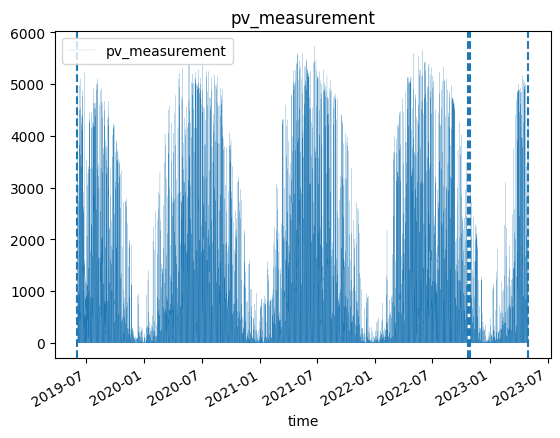

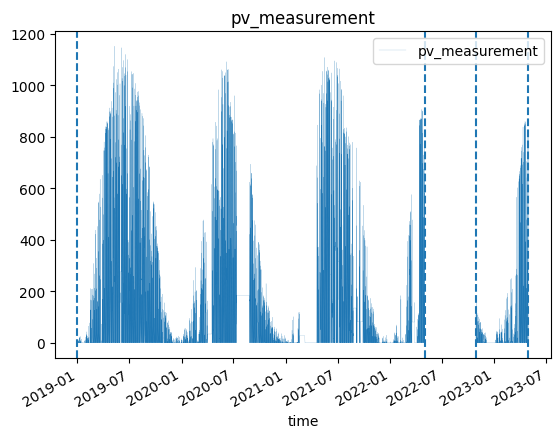

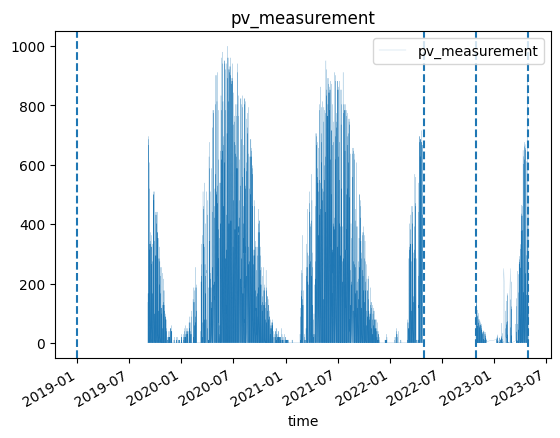

In [5]:
if display_plots:
    for loc in data:
        obs_start = data[loc]["train_obs"]["date_forecast"].min()
        obs_end = data[loc]["train_obs"]["date_forecast"].max()
        est_start = data[loc]["train_est"]["date_forecast"].min()
        est_end = data[loc]["train_est"]["date_forecast"].max()
        
        ax = data[loc]["train_tar"].set_index("time").plot(lw=0.1)
        ax.axvline(obs_start, linestyle='--')
        ax.axvline(obs_end, linestyle='--')
        ax.axvline(est_start, linestyle='--')
        ax.axvline(est_end, linestyle='--')
        ax.set_title("pv_measurement")
        plt.show()

## Transform data

Transform the raw data to be on the X y form

In [6]:
def transform_data(data):
    # Create empty list of location train data and location test data
    Xs = {loc : {} for loc in data}
    ys = {loc : {} for loc in data}
    
    for loc in data:
        # Copy data
        data_obs = data[loc]["train_obs"].copy()
        data_est = data[loc]["train_est"].copy()
        data_test = data[loc]["test_est"].copy()
        data_tar = data[loc]["train_tar"].copy()
        
        # Add a column with the difference between date_forecast and date_calc in seconds and 
        data_obs["forecast_seconds"] = 0
        data_est["forecast_seconds"] = (data_est["date_forecast"] - data_est["date_calc"]).apply(lambda x: x.total_seconds())
        data_test["forecast_seconds"] = (data_test["date_forecast"] - data_test["date_calc"]).apply(lambda x: x.total_seconds())
    
        # Remove unneeded columns
        del data_est["date_calc"]
        del data_test["date_calc"]
        del data_obs["snow_density:kgm3"]
        del data_est["snow_density:kgm3"]
        del data_test["snow_density:kgm3"]

        # Find start and end date for obvsersed and estimated data
        obs_end = data_obs["date_forecast"].max()
        est_start = data_est["date_forecast"].min()
        treshold_date = obs_end + (est_start - obs_end) / 2
        
        # Outer join target data with estimated and observed data
        Xy_obs = pd.merge(
            data_tar[data_tar["time"] <= treshold_date],
            data_obs.rename(columns={"date_forecast": "time"}),
            on="time",
            how="outer"
        ).set_index("time").sort_index()
        Xy_est = pd.merge(
            data_tar[data_tar["time"] > treshold_date],
            data_est.rename(columns={"date_forecast": "time"}),
            on="time",
            how="outer"
        ).set_index("time").sort_index()

        # Assign Xs
        Xs[loc]["obs"] = Xy_obs.drop("pv_measurement", axis=1)
        Xs[loc]["est"] = Xy_est.drop("pv_measurement", axis=1)
        Xs[loc]["test"] = data_test.rename(columns={"date_forecast": "time"}).set_index("time").sort_index()

        # Assign ys
        ys[loc]["obs"] = Xy_obs["pv_measurement"]
        ys[loc]["est"] = Xy_est["pv_measurement"]
        
    return Xs, ys

Xs, ys = transform_data(data)

Check that they have the same columns

In [7]:
def has_same_columns(df_lst):
    return all(set(df.columns) == set(df_lst[0].columns) for df in df_lst)

def are_all_equal(lst):
    return all(x == lst[0] for x in lst)

Xs_cols = Xs["A"]["obs"].columns.copy()
ys_col = ys["A"]["obs"].name

display(
    has_same_columns([Xs[loc][type] for loc in Xs for type in Xs[loc]]), 
    are_all_equal([ys[loc][type].name for loc in ys for type in ys[loc]])
)

True

True

See stats about the data

In [8]:
pd.concat([Xs[loc][type] for loc in Xs for type in Xs[loc]]).describe()

absolute_humidity_2m:gm3  air_density_2m:kgm3  ceiling_height_agl:m  \
count             413791.000000        413791.000000         338248.000000   
mean                   6.022480             1.255468           2796.203857   
std                    2.767936             0.037358           2488.790527   
min                    0.500000             1.139000             27.600000   
25%                    4.000000             1.230000           1048.199951   
50%                    5.400000             1.255000           1821.800049   
75%                    7.900000             1.279000           3795.424805   
max                   18.900000             1.441000          12431.299805   

       clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  \
count           4.137910e+05    413791.000000     381929.000000   
mean            5.340971e+05       148.360306       1717.518188   
std             8.383486e+05       233.465897       1775.247437   
min             0.000000e+00         0.000000         27.299999   
25%             0.000000e+00         0.000000        596.700012   
50%             9.416100e+03         0.000000       1158.300049   
75%             8.397916e+05       233.699997       2067.500000   
max             3.007722e+06       837.000000      11688.900391   

       dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  \
count    413791.000000   413791.000000  413791.000000      4.137910e+05   
mean          0.002364      275.193665      40.693062      1.464950e+05   
std           0.253579        7.009235      61.931904      2.201175e+05   
min          -1.000000      247.300003       0.000000      0.000000e+00   
25%           0.000000      270.600006       0.000000      0.000000e+00   
50%           0.000000      275.000000       0.000000      1.198950e+04   
75%           0.000000      280.600006      68.300003      2.453228e+05   
max           1.000000      295.100006     345.700012      1.217465e+06   

        direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p    elevation:m  \
count  413791.000000     4.137910e+05            413791.000000  413791.000000   
mean       51.762341     1.863446e+05                67.066154      12.303769   
std       115.628448     4.105117e+05                34.583103       8.251439   
min         0.000000     0.000000e+00                 0.000000       6.000000   
25%         0.000000     0.000000e+00                41.599998       6.000000   
50%         0.000000     0.000000e+00                80.400002       7.000000   
75%        30.500000     1.181203e+05                98.900002      24.000000   
max       689.799988     2.451235e+06               100.000000      24.000000   

       fresh_snow_12h:cm  fresh_snow_1h:cm  fresh_snow_24h:cm  \
count      413791.000000     413791.000000      413791.000000   
mean            0.139911          0.011645           0.276628   
std             0.842233          0.118890           1.340529   
min             0.000000          0.000000           0.000000   
25%             0.000000          0.000000           0.000000   
50%             0.000000          0.000000           0.000000   
75%             0.000000          0.000000           0.000000   
max            37.599998          7.700000          37.599998   

       fresh_snow_3h:cm  fresh_snow_6h:cm     is_day:idx  is_in_shadow:idx  \
count     413791.000000     413791.000000  413791.000000     413791.000000   
mean           0.035001          0.069955       0.490383          0.559183   
std            0.297705          0.511651       0.499908          0.496486   
min            0.000000          0.000000       0.000000          0.000000   
25%            0.000000          0.000000       0.000000          0.000000   
50%            0.000000          0.000000       0.000000          1.000000   
75%            0.000000          0.000000       1.000000          1.000000   
max           20.799999         34.099998       1.000000          1.000000   

     

## Visualize data

Plot timeperiod of test dates

time
0 days 00:15:00    2862
1 days 00:15:00      10
3 days 00:15:00       3
2 days 00:15:00       2
4 days 00:15:00       1
7 days 00:15:00       1
Name: count, dtype: int64

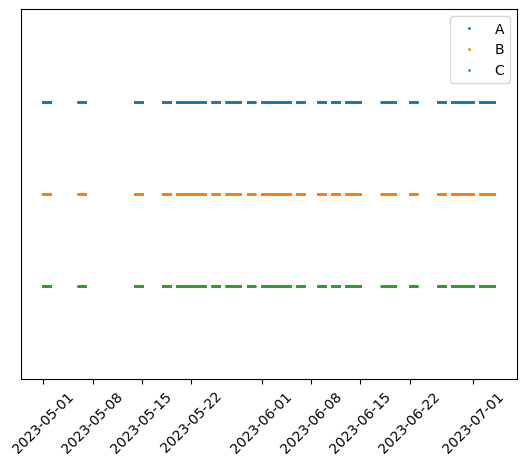

True

2880

In [9]:
test_dates = {loc: Xs[loc]["test"].index.copy() for loc in Xs}

if display_plots:
    for height, loc in zip([3,2,1], test_dates):
        plt.plot(test_dates[loc], [height] * len(test_dates[loc]), marker='o', markersize=1, linestyle='')
        
    display(test_dates[loc].to_series().diff().value_counts())

    plt.gca().axes.get_yaxis().set_visible(False)    
    plt.ylim(0, 4)
    plt.legend([loc for loc in test_dates])
    plt.xticks(rotation=45)
    plt.show()

def are_all_equal_series(series_lst):
    return all((series == series_lst[0]).all() for series in series_lst)

display(are_all_equal_series([test_dates[loc] for loc in test_dates]))
test_dates = test_dates["A"]
len(test_dates)

Display ys

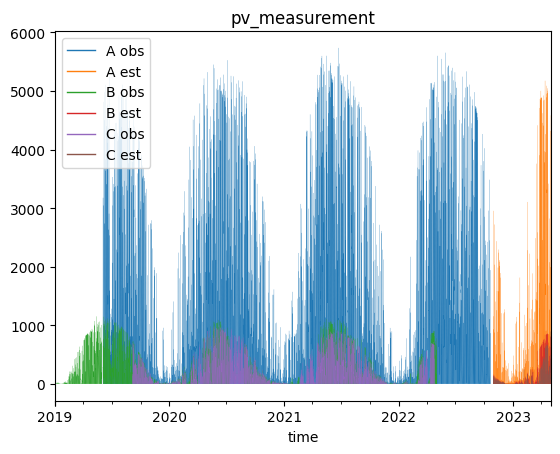

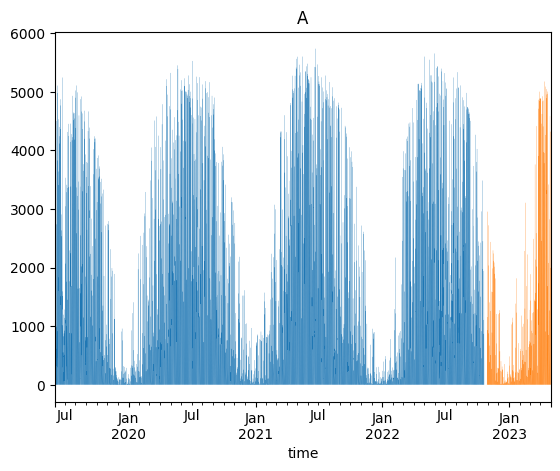

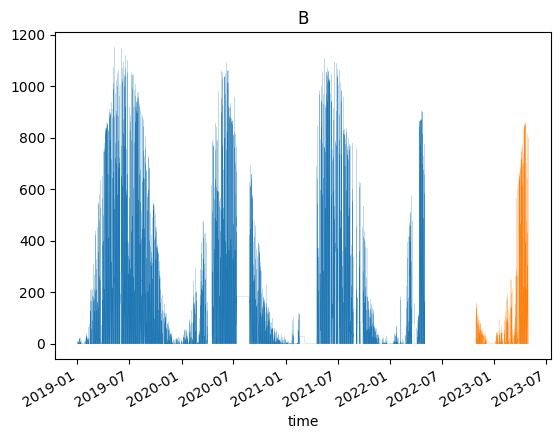

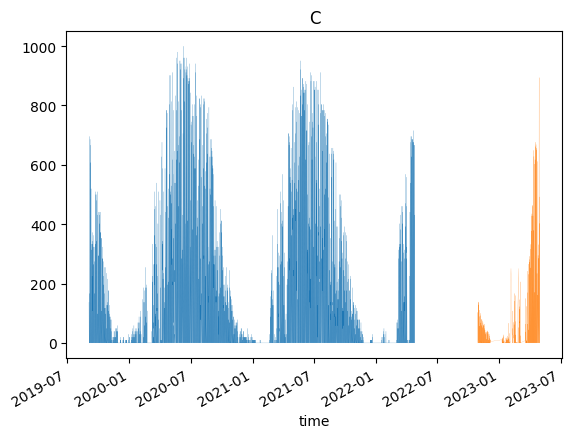

In [10]:
if display_plots:
    for loc in ys:
        for type in ys[loc]:
            ax = ys[loc][type].dropna().plot(lw=0.1)
    
    ax.set_title(ys_col)
    legend = ax.legend([loc + " " + type for loc in ys for type in ys[loc]])
    for line in legend.get_lines():
        line.set_linewidth(1)
    plt.show()
    
    for loc in ys:
        for type in ys[loc]:
            ax = ys[loc][type].dropna().plot(lw=0.1)
    
        ax.set_title(loc)
        plt.show()

Display Xs only with nan values

Index(['ceiling_height_agl:m', 'cloud_base_agl:m'], dtype='object')

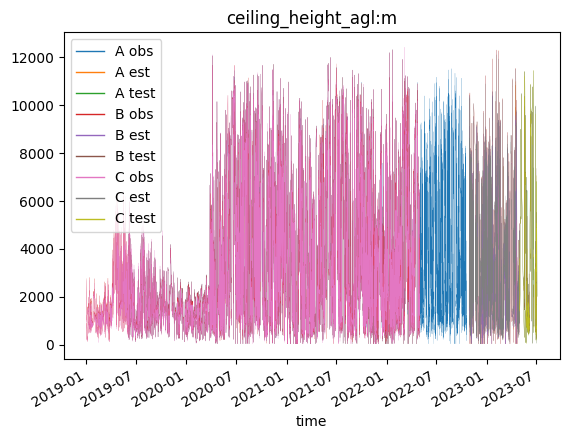

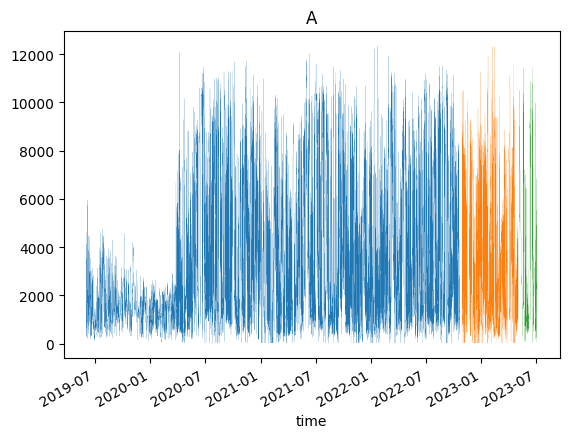

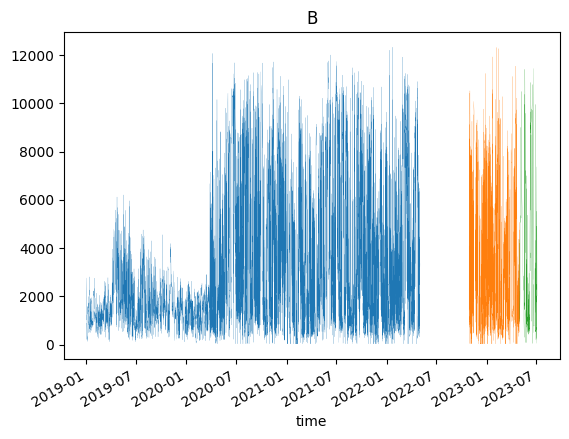

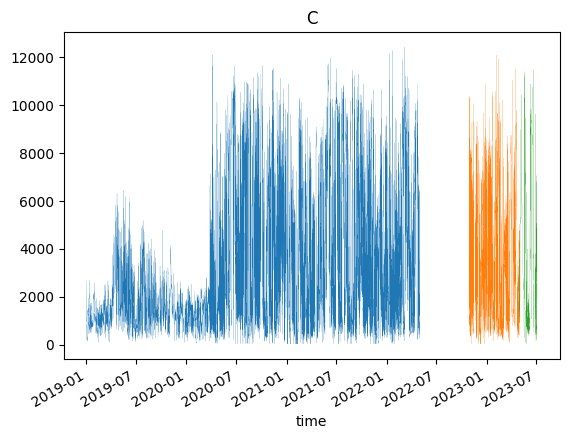

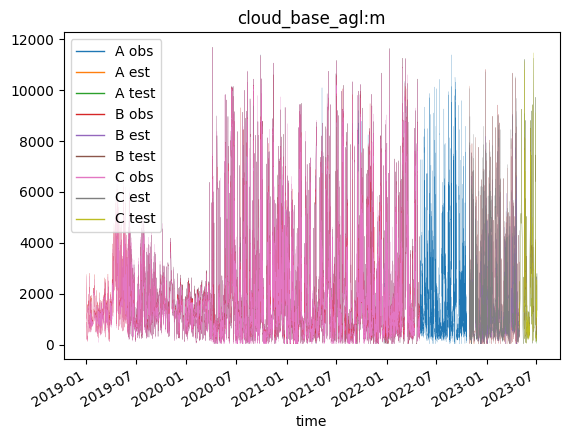

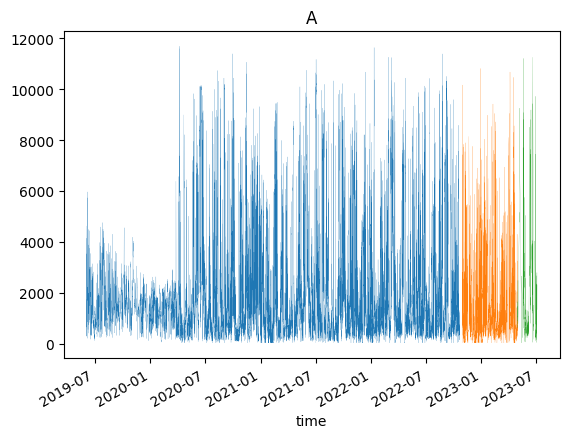

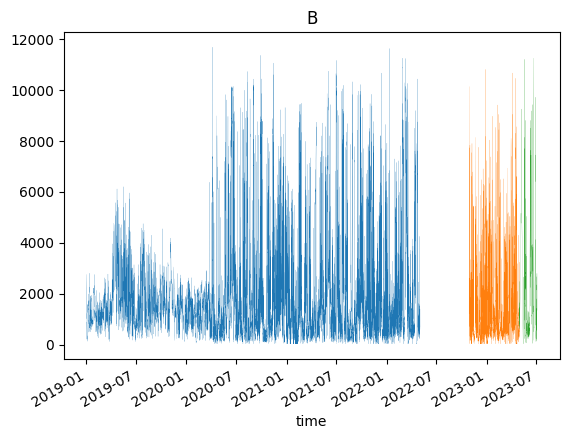

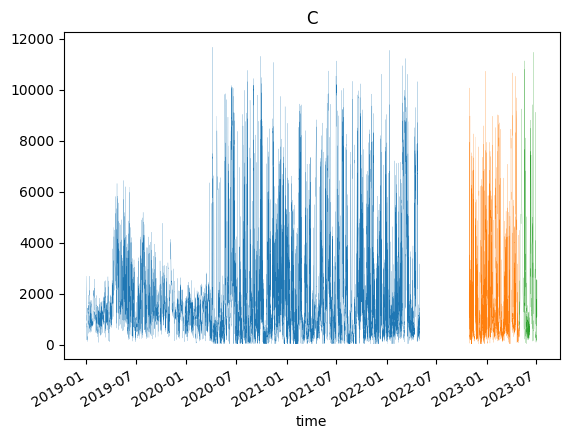

In [11]:
Xs_cols_with_nan = Xs_cols[pd.concat([Xs[loc][type].dropna(how='all') for loc in Xs for type in Xs[loc]]).isna().any()]
display(Xs_cols_with_nan)

if display_plots:
    for col in Xs_cols_with_nan:
        for loc in Xs:
            for type in Xs[loc]:
                ax = Xs[loc][type][col].dropna().plot(lw=0.1)
    
        ax.set_title(col)
        legend = ax.legend([loc + " " + type for loc in ys for type in Xs[loc]])
        for line in legend.get_lines():
            line.set_linewidth(1)
        plt.show()

        for loc in Xs:
            for type in Xs[loc]:
                ax = Xs[loc][type][col].dropna().plot(lw=0.1)
        
            ax.set_title(loc)
            plt.show()

Plot histogram of the data

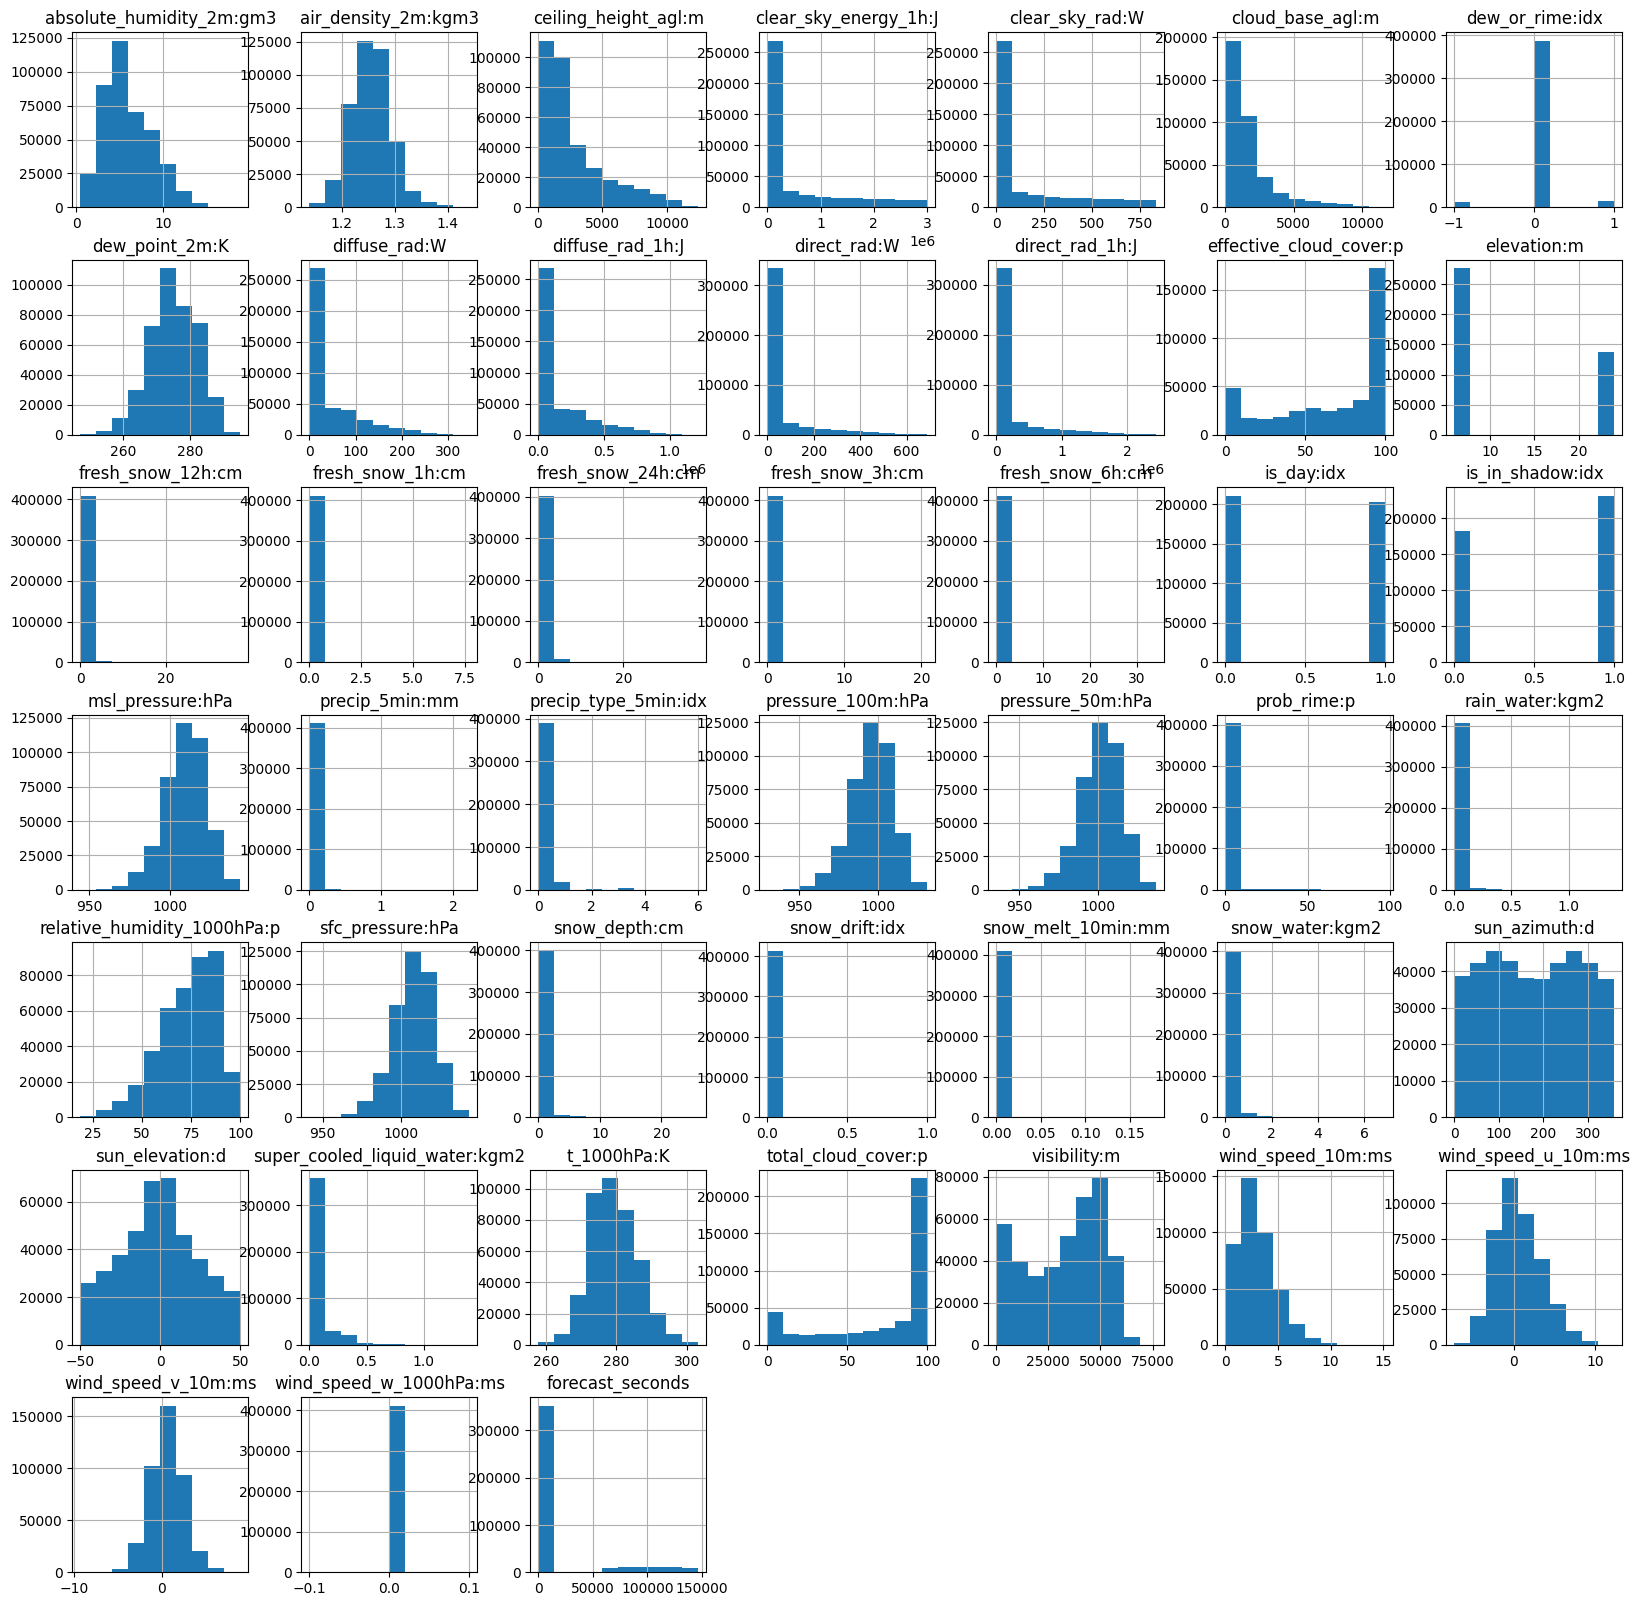

In [12]:
if display_plots:
    pd.concat([Xs[loc][type] for loc in Xs for type in Xs[loc]]).hist(figsize=(20,20))
    plt.show()

Plot correlation matrix of the data

[(0, 'absolute_humidity_2m:gm3'),
 (1, 'air_density_2m:kgm3'),
 (2, 'ceiling_height_agl:m'),
 (3, 'clear_sky_energy_1h:J'),
 (4, 'clear_sky_rad:W'),
 (5, 'cloud_base_agl:m'),
 (6, 'dew_or_rime:idx'),
 (7, 'dew_point_2m:K'),
 (8, 'diffuse_rad:W'),
 (9, 'diffuse_rad_1h:J'),
 (10, 'direct_rad:W'),
 (11, 'direct_rad_1h:J'),
 (12, 'effective_cloud_cover:p'),
 (13, 'elevation:m'),
 (14, 'fresh_snow_12h:cm'),
 (15, 'fresh_snow_1h:cm'),
 (16, 'fresh_snow_24h:cm'),
 (17, 'fresh_snow_3h:cm'),
 (18, 'fresh_snow_6h:cm'),
 (19, 'is_day:idx'),
 (20, 'is_in_shadow:idx'),
 (21, 'msl_pressure:hPa'),
 (22, 'precip_5min:mm'),
 (23, 'precip_type_5min:idx'),
 (24, 'pressure_100m:hPa'),
 (25, 'pressure_50m:hPa'),
 (26, 'prob_rime:p'),
 (27, 'rain_water:kgm2'),
 (28, 'relative_humidity_1000hPa:p'),
 (29, 'sfc_pressure:hPa'),
 (30, 'snow_depth:cm'),
 (31, 'snow_drift:idx'),
 (32, 'snow_melt_10min:mm'),
 (33, 'snow_water:kgm2'),
 (34, 'sun_azimuth:d'),
 (35, 'sun_elevation:d'),
 (36, 'super_cooled_liquid_water

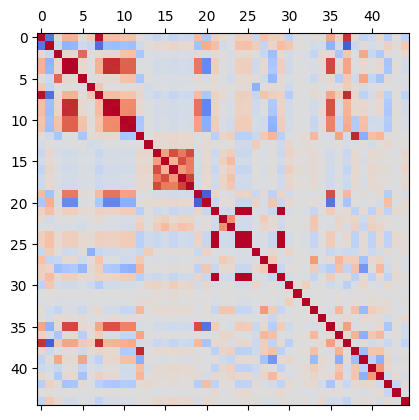

In [13]:
if display_plots:
    display(list(zip(range(len(Xs_cols)), Xs_cols)))
    plt.matshow(pd.concat([Xs[loc][type] for loc in Xs for type in Xs[loc]]).corr(), cmap="coolwarm", vmin=-1, vmax=1)
    plt.show()

## Gap detection

Plot timeperiod of test dates

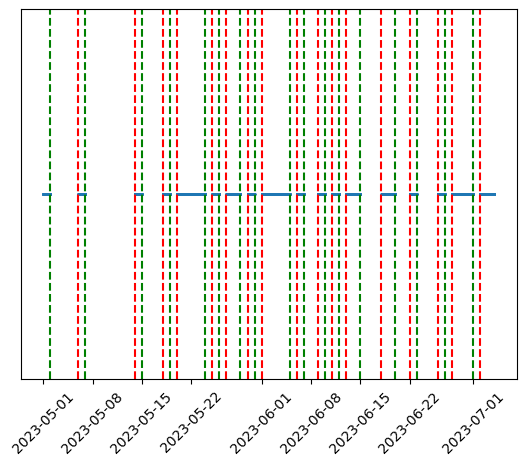

In [14]:
def date_gaps_detection(dates, min_gap_time):
    diff = dates.to_series().diff()
    return list(zip(diff[diff.shift(-1) > min_gap_time].index, diff[diff > min_gap_time].index))

min_gap_time_date = pd.Timedelta(days=1)
gaps_test = date_gaps_detection(test_dates, min_gap_time_date)

if display_plots:
    plt.plot(test_dates, [1] * len(test_dates), marker='o', markersize=1, linestyle='')

    ax = plt.gca()
    for start_date, end_date in gaps_test:
        ax.axvline(start_date, linestyle='--', color="green")
        ax.axvline(end_date, linestyle='--', color="red")
    ax.axes.get_yaxis().set_visible(False)
    plt.xticks(rotation=45)
    plt.show()

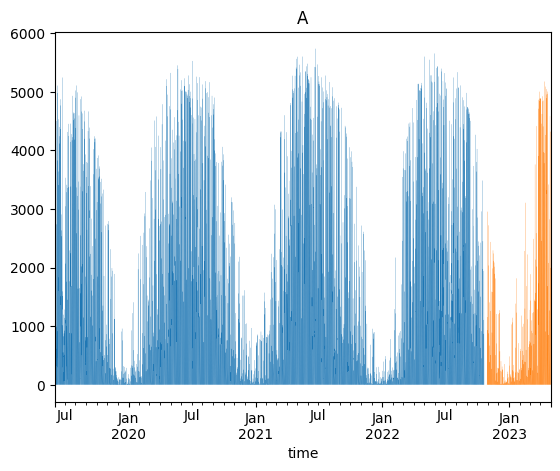

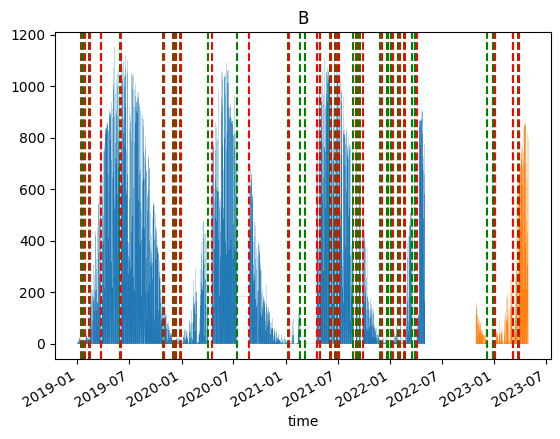

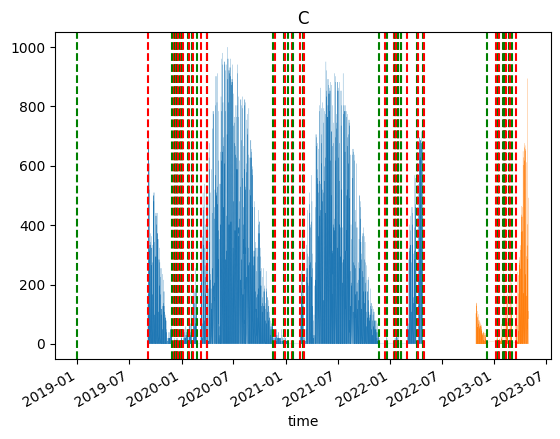

In [15]:
def value_gaps_detection(x, min_gap_time, time_padding=pd.Timedelta(seconds=1)):    
    start_date = x.index[0] - time_padding
    start_val = x.iloc[0]

    gaps_date = []
    index = x.dropna().index
    
    for date in index:
        val = x[date]
        
        if(val != start_val):
            if(date - start_date > min_gap_time):
                gaps_date.append((start_date, date))
    
            start_date = date
            start_val = val

    i = min(x.index.get_loc(index[-1]) + 1, len(x) - 1)
    if(x.index[i] - start_date > min_gap_time):
        gaps_date.append((start_date, x.index[i]))

    if(x.index[-1] - x.index[i-1] > min_gap_time):
        gaps_date.append((x.index[i-1], x.index[-1] + time_padding))

    return gaps_date

min_gap_time_value = pd.Timedelta(days=2)
gaps_ys = {loc : {} for loc in ys}
for loc in ys:
    for type in ys[loc]:
        gaps_ys[loc][type] = value_gaps_detection(ys[loc][type], min_gap_time_value)

if display_plots:
    for loc in ys:
        for type in ys[loc]:
            ax = ys[loc][type].dropna().plot(lw=0.1)
            
            for start_date, end_date in gaps_ys[loc][type]:
                ax.axvline(start_date, linestyle='--', color="green")
                ax.axvline(end_date, linestyle='--', color="red")
            ax.set_title(loc)
        plt.show()

## Timeseries data preprocessing

Combine and reindex to regular timeseries

In [16]:
Xs_15min = {loc: {} for loc in Xs}
ys_15min = {loc: {} for loc in ys}

Xs_1hour = {loc: {} for loc in Xs}
ys_1hour = {loc: {} for loc in ys}

end_padding = pd.DateOffset(days=1)

for loc in Xs:
    Xs[loc] = pd.concat(Xs[loc].values())
    ys[loc] = pd.concat(ys[loc].values())
    
    Xs_15min[loc] = Xs[loc].reindex(pd.date_range(start=Xs[loc].index[0], end=Xs[loc].index[-1]+end_padding, freq="15T"))
    ys_15min[loc] = ys[loc].reindex(pd.date_range(start=ys[loc].index[0], end=ys[loc].index[-1], freq="15T"))

    Xs_1hour[loc] = Xs[loc].reindex(pd.date_range(start=Xs[loc].index[0], end=Xs[loc].index[-1]+end_padding, freq="H"))
    ys_1hour[loc] = ys[loc].reindex(pd.date_range(start=ys[loc].index[0], end=ys[loc].index[-1], freq="H"))

Fill constant gaps with values from other timeseries

In [17]:
def fill_gaps_from_other(x1, x2, min_gap_time):
    index = x1.index.union(x2.index).sort_values()
    x1 = x1.reindex(index)
    x2 = x2.reindex(index)

    gaps1 = value_gaps_detection(x1, min_gap_time)
    gaps2 = value_gaps_detection(x2, min_gap_time)
    
    for (start_date, end_date) in gaps1:        
        gap_dates = index[(start_date < index) & (index < end_date)]
        x1[gap_dates] = x2[gap_dates]

    for (start_date, end_date) in gaps2:
        gap_dates = index[(start_date < index) & (index < end_date)]
        x2[gap_dates] = x1[gap_dates]

    return x1, x2

for _ys in [ys, ys_15min, ys_1hour]:
    _ys["B"], _ys["C"] = fill_gaps_from_other(_ys["B"], _ys["C"], pd.Timedelta(days=1))

Take the mean of two timeseries

In [18]:
def mean(X1, X2):
    index = X1.index.union(X2.index).sort_values()
    X1 = X1.reindex(index)
    X2 = X2.reindex(index)
    return (X1.combine_first(X2) + X2.combine_first(X1)) / 2

for _Xs in [Xs, Xs_15min, Xs_1hour]:
    _Xs["BC"] = mean(_Xs["B"], _Xs["C"])

for _ys in [ys, ys_15min, ys_1hour]:
    _ys["BC"] = mean(_ys["B"], _ys["C"])

Fill gaps with earlier data

In [19]:
def fill_gaps_offset(X, fill_date_offset, min_gap_time):
    gaps = date_gaps_detection(X.dropna(how='all').index.union(X.index[-1:]), min_gap_time)
    
    index = X.index
    X_copy = X.copy()
    
    for start_date, end_date in sorted(gaps):
        if start_date - fill_date_offset >= index[0]:
            X_copy[(start_date < X.index) & (X.index < end_date)] = X[(start_date - fill_date_offset < X.index) & (X.index < end_date - fill_date_offset)].values
    return X_copy

for _Xs in [Xs_15min, Xs_1hour]:
    for loc in _Xs:
        _Xs[loc] = fill_gaps_offset(_Xs[loc], fill_date_offset=pd.DateOffset(years=1), min_gap_time=pd.Timedelta(days=1))

for _ys in [ys_15min, ys_1hour]:
    for loc in _ys:
        _ys[loc] = fill_gaps_offset(_ys[loc], fill_date_offset=pd.DateOffset(years=1), min_gap_time=pd.Timedelta(days=1))

Time interpolate missing values

In [20]:
for _Xs in [Xs, Xs_15min, Xs_1hour]:
    for loc in _Xs:
        _Xs[loc] = _Xs[loc].interpolate(method='time', limit_direction="both")

for _ys in [ys, ys_15min, ys_1hour]:
    for loc in _ys:
        _ys[loc] = _ys[loc].interpolate(method='time', limit_direction="both")

### Validate timeseries preprocessing

Check for nan values

In [21]:
for _Xs in [Xs, ys, Xs_15min, ys_15min, Xs_1hour, ys_1hour]:
    display(pd.concat(_Xs.values()).isna().sum())

absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
dew_or_rime:idx                   0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
elevation:m                       0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
precip_type_5min:idx              0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                       0
rain_water:kgm2             

0

absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
dew_or_rime:idx                   0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
elevation:m                       0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
precip_type_5min:idx              0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                       0
rain_water:kgm2             

0

absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
dew_or_rime:idx                   0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
elevation:m                       0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
precip_type_5min:idx              0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                       0
rain_water:kgm2             

0

Check that the period is correct

In [22]:
for name, _ys in zip(["Xs 15min", "ys 15min", "Xs 1hour", "ys 1hour"], [Xs_15min, ys_15min, Xs_1hour, ys_1hour]):
    for loc in Xs_15min:
        display(name + " " + loc, Xs_15min[loc].index[0], Xs_15min[loc].index[-1], Xs_15min[loc].index.to_series().diff().value_counts())

'Xs_15min A'

Timestamp('2019-06-02 22:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    143335
Name: count, dtype: int64

'Xs_15min B'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    158019
Name: count, dtype: int64

'Xs_15min C'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    158019
Name: count, dtype: int64

'Xs_15min BC'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    158019
Name: count, dtype: int64

'ys_15min A'

Timestamp('2019-06-02 22:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    143335
Name: count, dtype: int64

'ys_15min B'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    158019
Name: count, dtype: int64

'ys_15min C'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    158019
Name: count, dtype: int64

'ys_15min BC'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    158019
Name: count, dtype: int64

'Xs_1hour A'

Timestamp('2019-06-02 22:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    143335
Name: count, dtype: int64

'Xs_1hour B'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    158019
Name: count, dtype: int64

'Xs_1hour C'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    158019
Name: count, dtype: int64

'Xs_1hour BC'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    158019
Name: count, dtype: int64

'ys_1hour A'

Timestamp('2019-06-02 22:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    143335
Name: count, dtype: int64

'ys_1hour B'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    158019
Name: count, dtype: int64

'ys_1hour C'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    158019
Name: count, dtype: int64

'ys_1hour BC'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-07-04 23:45:00')

0 days 00:15:00    158019
Name: count, dtype: int64

Plot ys

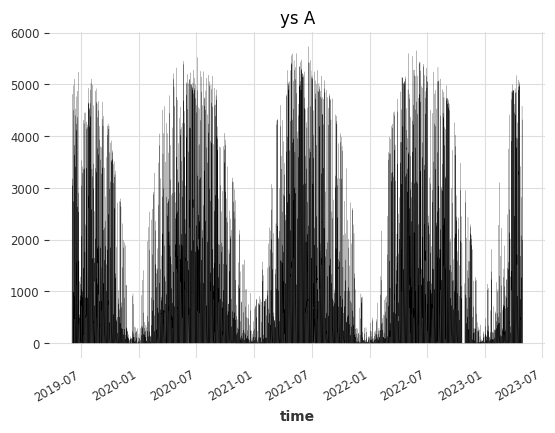

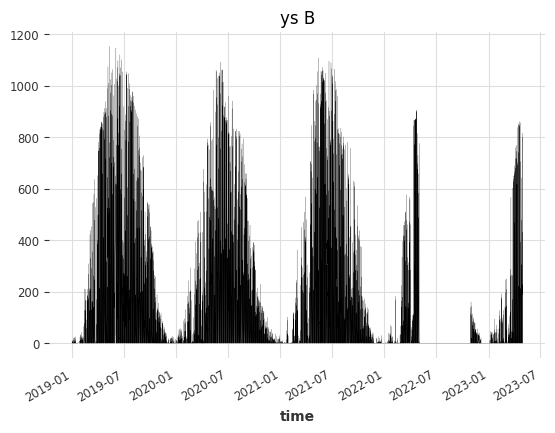

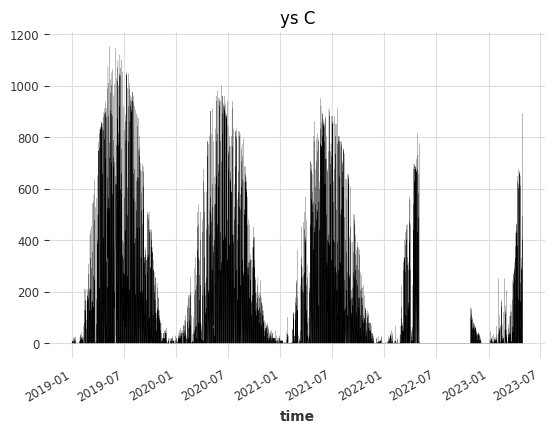

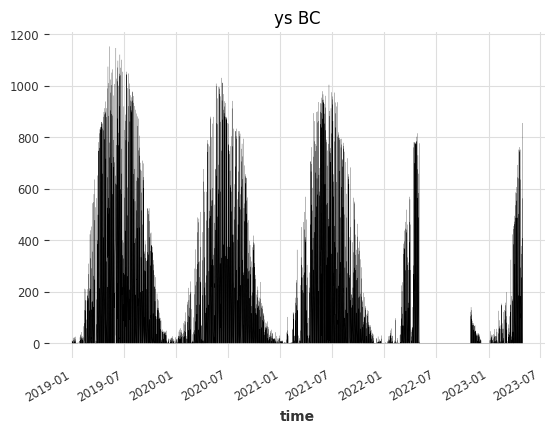

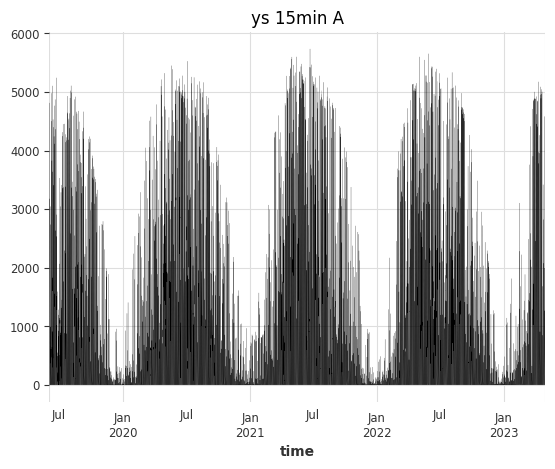

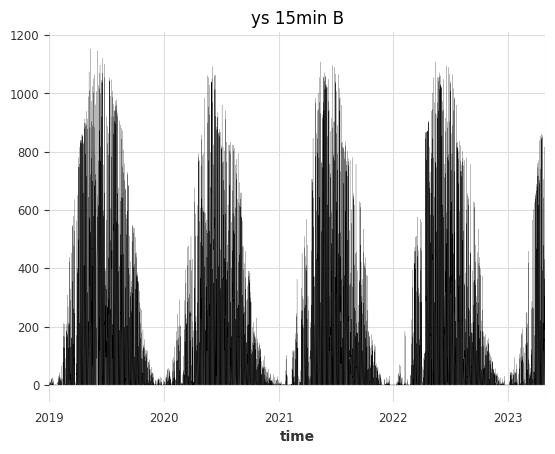

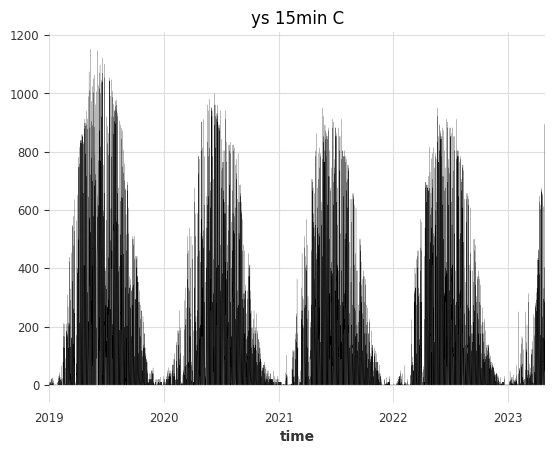

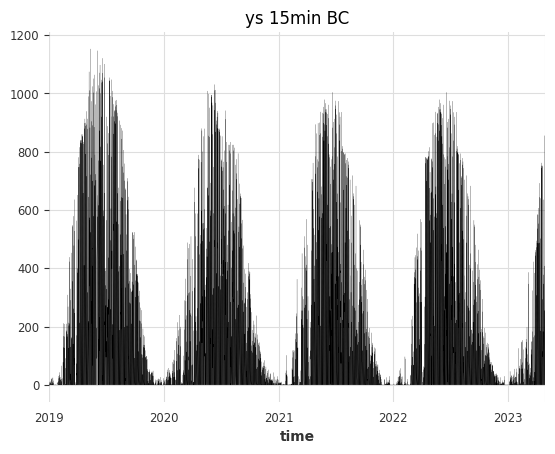

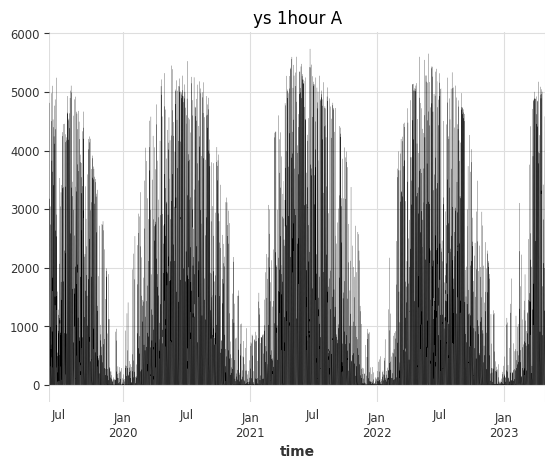

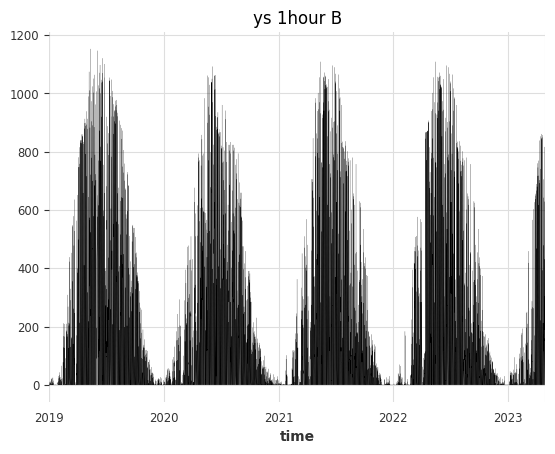

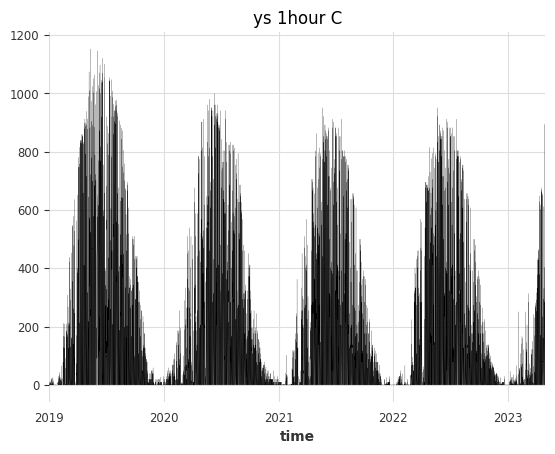

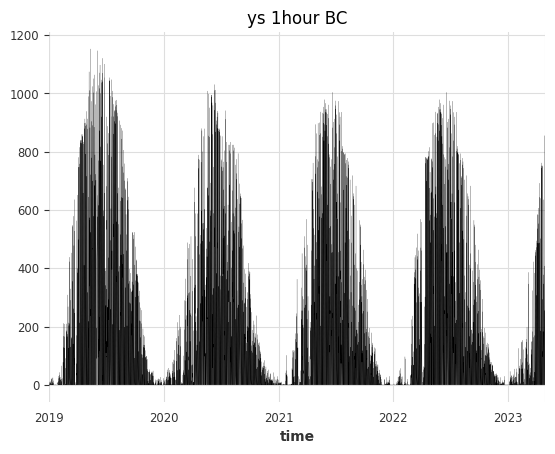

In [36]:
if display_plots:
    for name, _ys in zip(["ys", "ys 15min", "ys 1hour"], [ys, ys_15min, ys_1hour]):
        for loc in _ys:
            _ys[loc].plot(lw=0.1)
            plt.title(name + " " + loc)
            plt.show()

## More data preprocessing

One hot encoding of categorial values in X

In [24]:
def one_hot_encoding(X):
    return pd.get_dummies(X)

Z-score normalizing of numeric values in X

In [25]:
class StandardScaler:
    def __init__(self, X):
        self.means = X.mean(numeric_only=True)
        self.stds = X.std(numeric_only=True)

    def normalize(self, X):
        indices = self.indices(X)
        X_copy = X.copy()
        X_copy[indices] = (X[indices] - self.means[indices]) / self.stds[indices]
        return X_copy

    def denormalize(self, X):
        indices = self.indices(X)
        X_copy = X.copy()
        X_copy[indices] = X[indices] * self.stds[indices] + self.means[indices]
        return X_copy

    def indices(self, X):
        return self.means.index.intersection(X.columns)

Polynomial expansion of numeric values in X to degree n
    
Example:
If [x y] = X then
- degree 1: [1 x y]
- degree 2: [1 x y xx xy yy]
- degree 3: [1 x y xx xy yy xxx xxy xyy yyy]
- ...

Note: Since multiplication is commutitative then 
    xy = yx, xxy = xyx = yxx, xyy = yxy = yyx
so we skip non-lexicographically sorted multiplications.

In [26]:
def is_sorted(lst):
    return all(lst[i] <= lst[i+1] for i in range(len(lst) - 1))

def polynomial_expansion(X, degree=2, with_constant_term=False):
    cols = X.select_dtypes(include=["number"]).columns
    X_num = X.select_dtypes(include=["number"]).to_numpy()
    (m,n) = X_num.shape

    xs = [X]
    if(with_constant_term):
        xs.append(pd.Series(np.ones(m), name='1'))

    for d in range(2, degree+1):
        for indices in filter(is_sorted, itertools.product(range(n), repeat=d)):
            x = np.ones(m)
            for j in indices:
                x *= X_num[:,j]
            xs.append(pd.Series(x, name="_x_".join([cols[i] for i in indices])))

    return pd.concat(xs, axis=1)

Test functions

In [27]:
X = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9],
    'D': ['a', 'b', 'c'],
})

scaler = StandardScaler(X)
X_norm = scaler.normalize(X)

print(scaler.denormalize(X_norm))
print(X_norm)
print(one_hot_encoding(X))
print(polynomial_expansion(X))

     A    B    C  D
0  1.0  4.0  7.0  a
1  2.0  5.0  8.0  b
2  3.0  6.0  9.0  c
     A    B    C  D
0 -1.0 -1.0 -1.0  a
1  0.0  0.0  0.0  b
2  1.0  1.0  1.0  c
   A  B  C    D_a    D_b    D_c
0  1  4  7   True  False  False
1  2  5  8  False   True  False
2  3  6  9  False  False   True
   A  B  C  D  A_x_A  A_x_B  A_x_C  B_x_B  B_x_C  C_x_C
0  1  4  7  a    1.0    4.0    7.0   16.0   28.0   49.0
1  2  5  8  b    4.0   10.0   16.0   25.0   40.0   64.0
2  3  6  9  c    9.0   18.0   27.0   36.0   54.0   81.0


Normalize Xs and ys to standard scalar with sklearn

In [28]:
from sklearn.preprocessing import StandardScaler

Xs_norm = {}
Xs_15min_norm = {}
Xs_1hour_norm = {}

scaler_X = StandardScaler().fit(pd.concat(Xs.values()).to_numpy())
scaler_X_15min = StandardScaler().fit(pd.concat(Xs_15min.values()).to_numpy())
scaler_X_1hour = StandardScaler().fit(pd.concat(Xs_1hour.values()).to_numpy())

for name, _Xs, _Xs_norm, _scaler_X in zip(
    ["Xs", "Xs 15min", "Xs 1hour"],
    [Xs, Xs_15min, Xs_1hour], 
    [Xs_norm, Xs_15min_norm, Xs_1hour_norm], 
    [scaler_X, scaler_X_15min, scaler_X_1hour],
):
    for loc in _Xs:
        _Xs_norm[loc] = pd.DataFrame(
            _scaler_X.transform(_Xs[loc].to_numpy()), 
            columns = _Xs[loc].columns, 
            index = _Xs[loc].index,
        )
        display(name + " " + loc, _Xs_norm[loc].mean().mean(), _Xs_norm[loc].std().mean())

ys_norm = {}
ys_15min_norm = {}
ys_1hour_norm = {}

scaler_X = StandardScaler().fit(pd.concat(ys.values()).to_numpy().reshape(-1, 1))
scaler_X_15min = StandardScaler().fit(pd.concat(ys_15min.values()).to_numpy().reshape(-1, 1))
scaler_X_1hour = StandardScaler().fit(pd.concat(ys_1hour.values()).to_numpy().reshape(-1, 1))

for name, _ys, _ys_norm, _scaler_X in zip(
    ["ys", "ys 15min", "ys 1hour"],
    [ys, ys_15min, ys_1hour], 
    [ys_norm, ys_15min_norm, ys_1hour_norm], 
    [scaler_X, scaler_X_15min, scaler_X_1hour],
):
    for loc in _ys:
        _ys_norm[loc] = pd.Series(
            _scaler_X.transform(_ys[loc].to_numpy().reshape(-1, 1)).flatten(), 
            name = _ys[loc].name, 
            index = _ys[loc].index,
        )
        display(name + " " + loc, _ys_norm[loc].mean().mean(), _ys_norm[loc].std().mean())

'Xs A'

-0.013722163435579667

0.8712926389362526

'Xs B'

-0.02872032214809985

0.9076668343889518

'Xs C'

0.03847220047928406

1.0777905570228696

'Xs BC'

0.004173064749722134

0.9664201774289113

'Xs 15min A'

-0.021352387645308134

0.8731855271306092

'Xs 15min B'

-0.026184860676079242

0.9075520250961595

'Xs 15min C'

0.039673941081213464

1.074747912480272

'Xs 15min BC'

0.005879137766793374

0.9656968411026348

'Xs 1hour A'

-0.021656891182458667

0.873670063162539

'Xs 1hour B'

-0.025961822487820082

0.906661364233939

'Xs 1hour C'

0.0396852982899321

1.0762372455124678

'Xs 1hour BC'

0.005920949932155457

0.9663407908846616

'ys A'

0.6224225229252355

1.7845559990144015

'ys B'

-0.20482064700669877

0.3071160736152457

'ys C'

-0.21548679747597888

0.28504134808377596

'ys BC'

-0.21016081372366233

0.2942884107176627

'ys 15min A'

0.6513143361212965

1.851983468355368

'ys 15min B'

-0.18867408668125804

0.3350474377184849

'ys 15min C'

-0.20352338307925522

0.305185998228631

'ys 15min BC'

-0.19610527253020496

0.31814375110063253

'ys 1hour A'

0.644419427572962

1.8553141824936537

'ys 1hour B'

-0.1866767552838642

0.33477972486371177

'ys 1hour C'

-0.20136885486460565

0.30498646458488154

'ys 1hour BC'

-0.1940292735156675

0.31770891566501636

Do PCA of Xs with sklearn

32

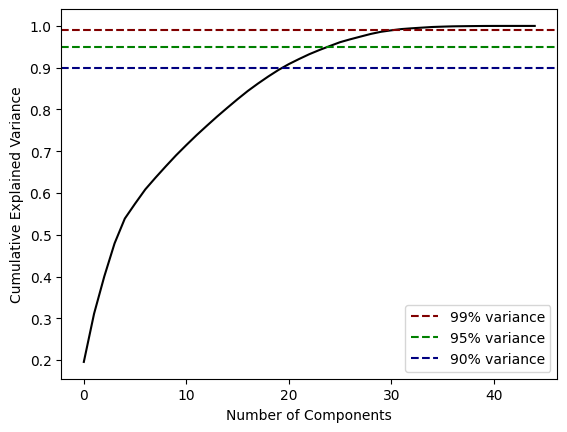

32

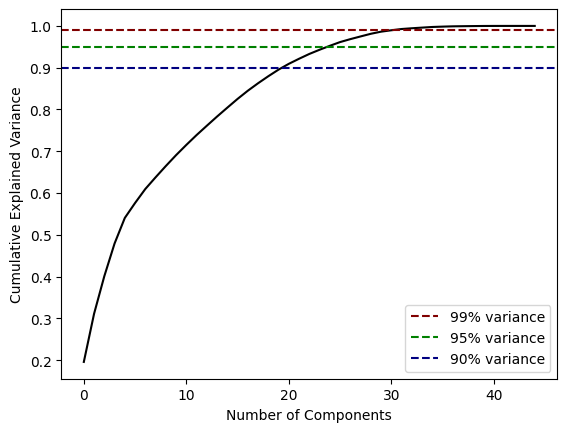

32

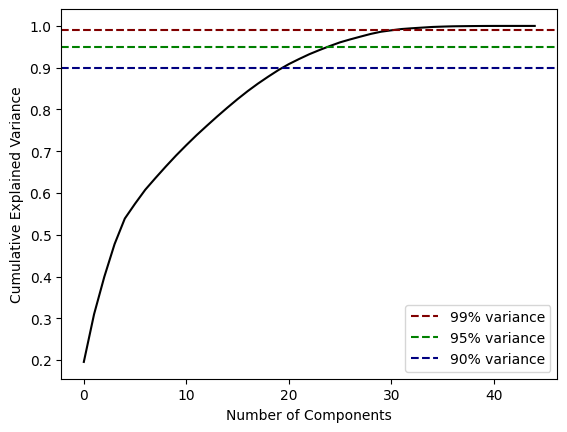

In [29]:
from sklearn.decomposition import PCA

Xs_pca = {}
Xs_15min_pca = {}
Xs_1hour_pca = {}

pca_X = PCA().fit(pd.concat(Xs_norm.values()).to_numpy())
pca_X_15min = PCA().fit(pd.concat(Xs_15min_norm.values()).to_numpy())
pca_X_1hour = PCA().fit(pd.concat(Xs_1hour_norm.values()).to_numpy())

for _Xs_pca, _Xs_norm, _pca_X in zip(
    [Xs_pca, Xs_15min_pca, Xs_1hour_pca],
    [Xs_norm, Xs_15min_norm, Xs_1hour_norm],
    [pca_X, pca_X_15min, pca_X_1hour],
):
    variance_threshold = 0.99
    explained_variance = _pca_X.explained_variance_ratio_
    cumulative_variance = explained_variance.cumsum()
    n_components = (cumulative_variance < variance_threshold).sum() + 1
    display(n_components)
    
    if display_plots:
        plt.plot(cumulative_variance, color="black")
        plt.xlabel("Number of Components")
        plt.ylabel("Cumulative Explained Variance")
        plt.axhline(0.99, linestyle='--', label='99% variance', color=(0.5, 0.0, 0.0))
        plt.axhline(0.95, linestyle='--', label='95% variance', color=(0.0, 0.5, 0.0))
        plt.axhline(0.90, linestyle='--', label='90% variance', color=(0.0, 0.0, 0.5))
        plt.legend()
        plt.show()

    for loc in Xs_norm:    
        _Xs_pca[loc] = pd.DataFrame(
            _pca_X.transform(_Xs_norm[loc].to_numpy())[:,:n_components], 
            columns = [f'PC{i}' for i in range(n_components)],
            index = _Xs_norm[loc].index
        )

Plot histogram of the data

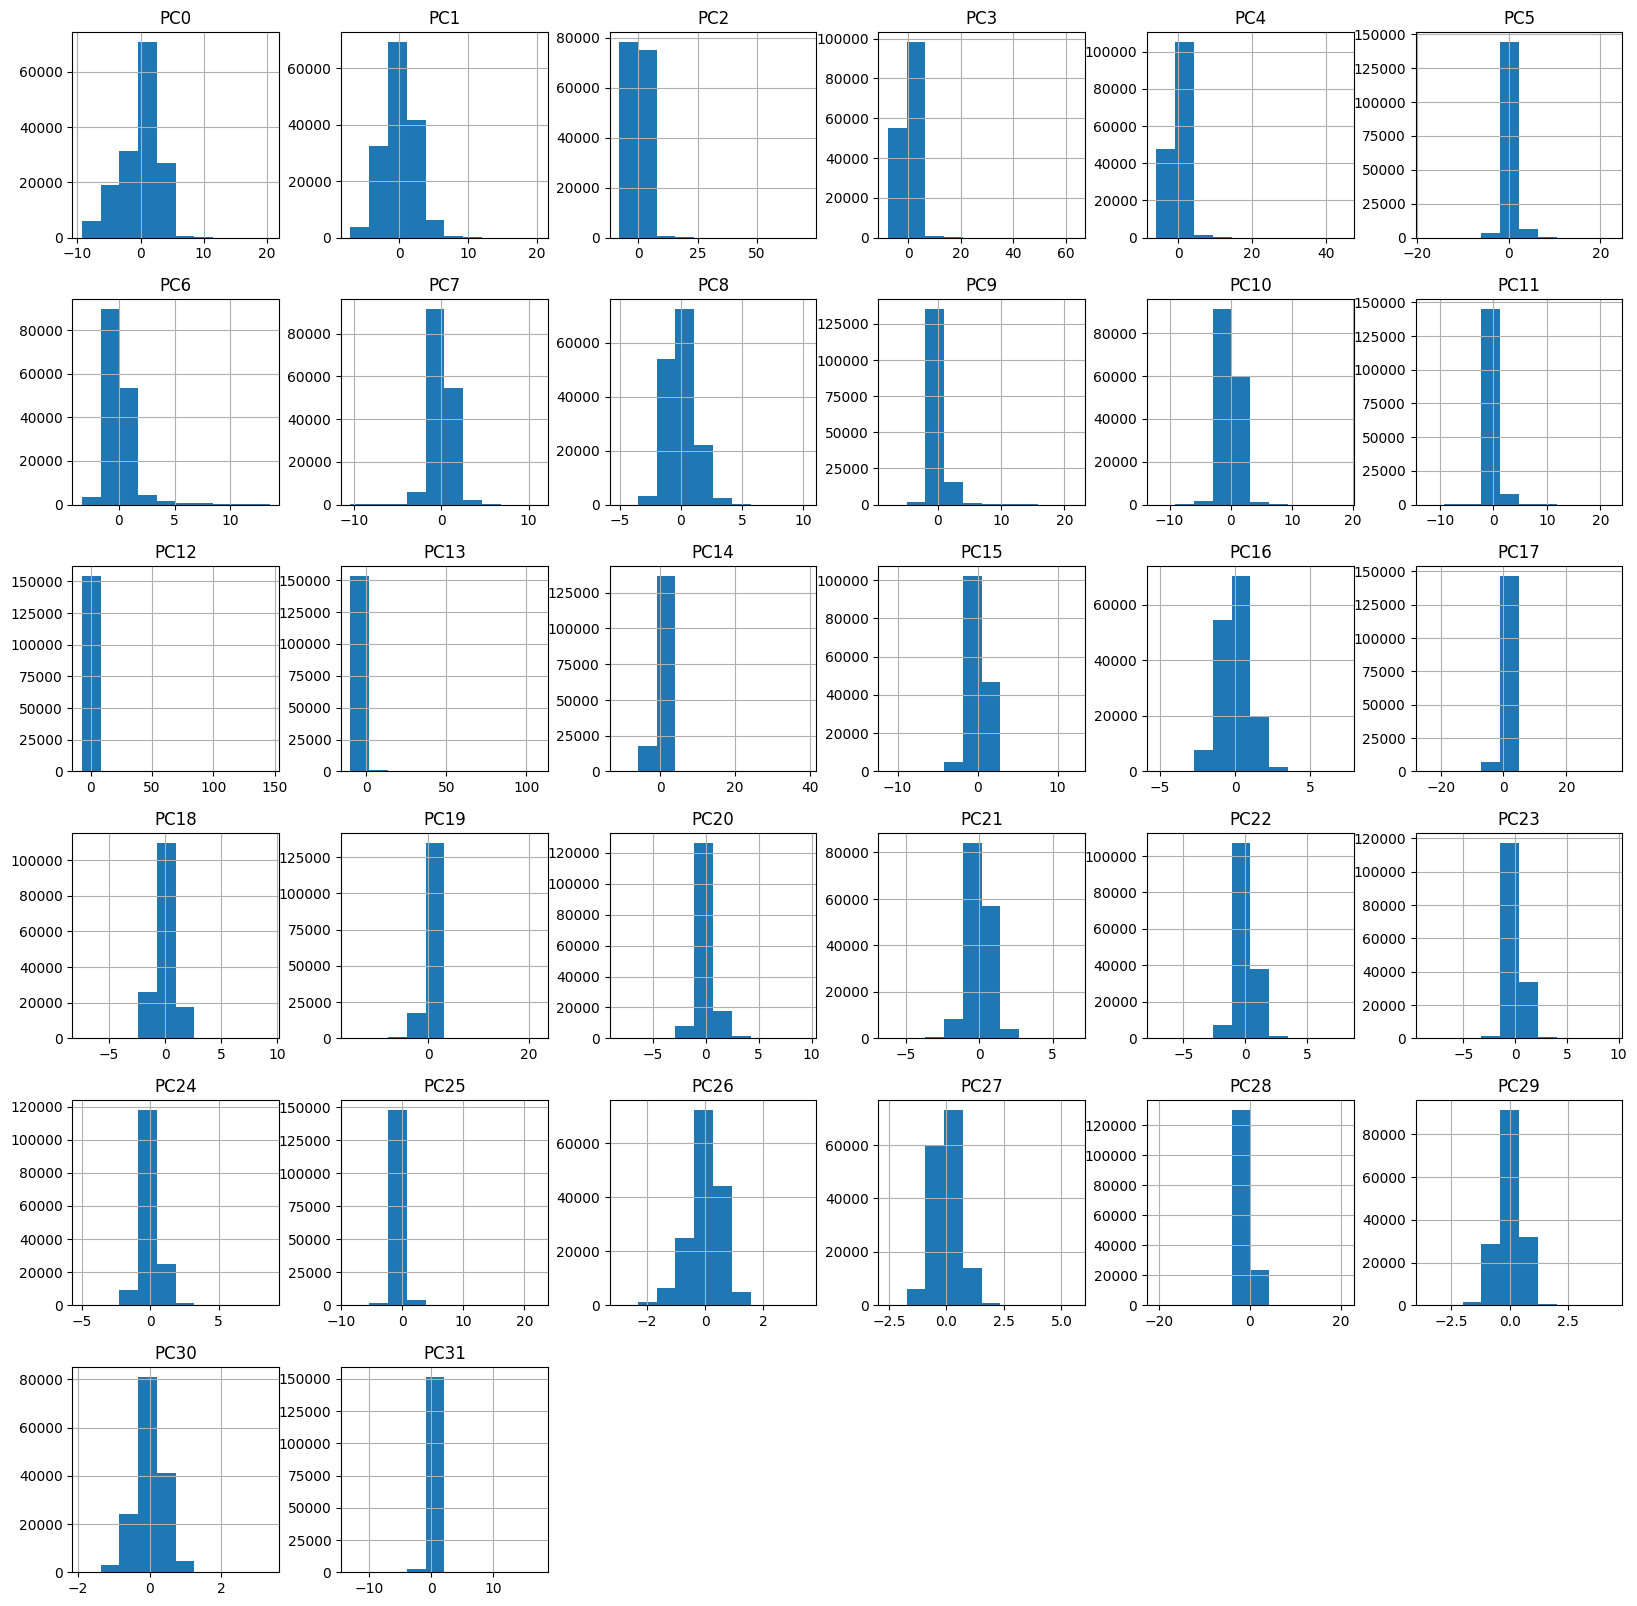

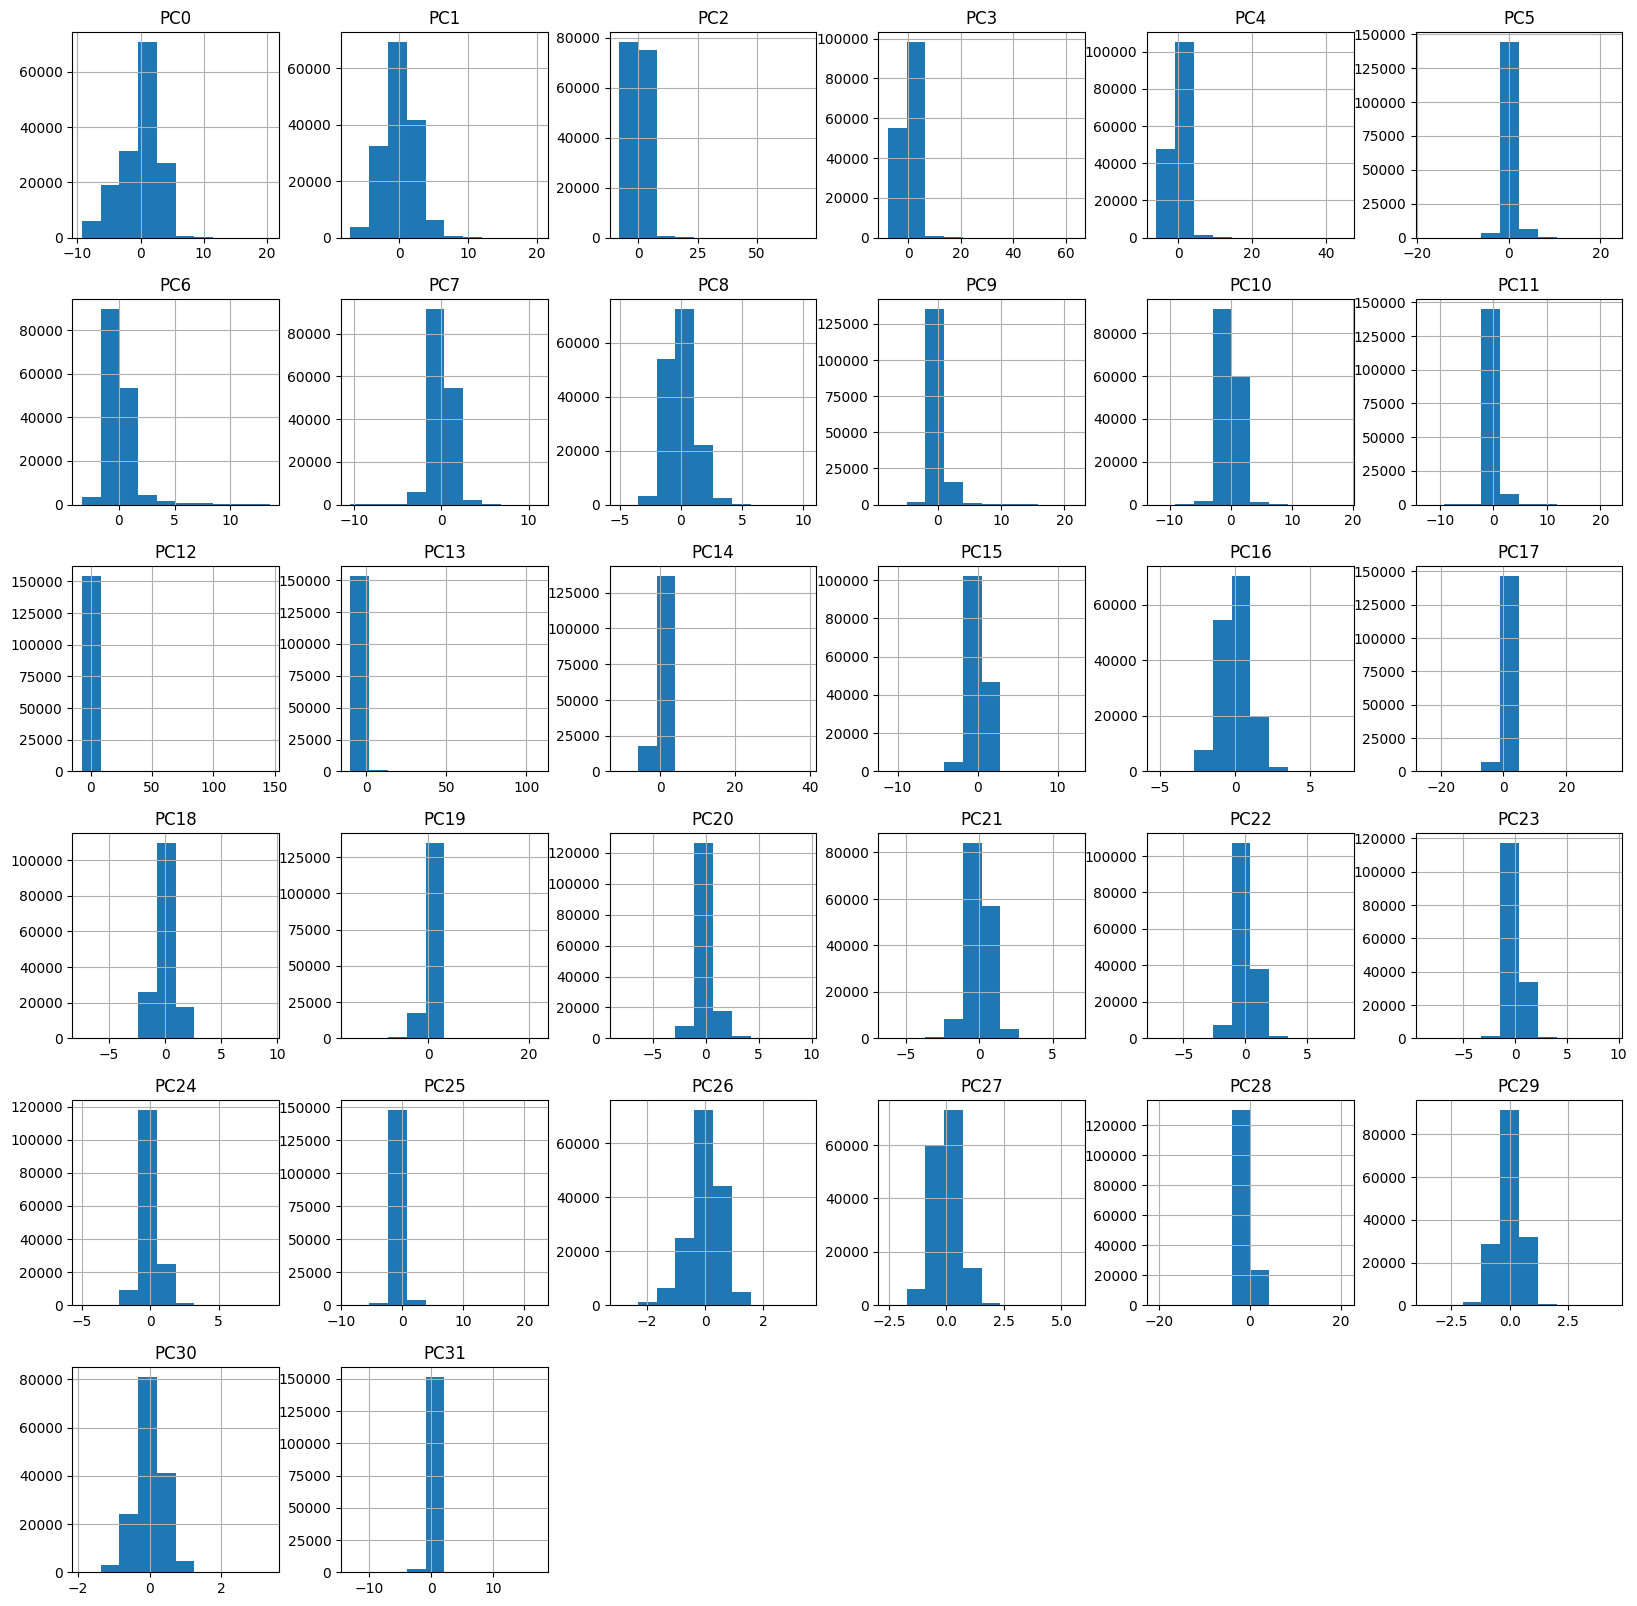

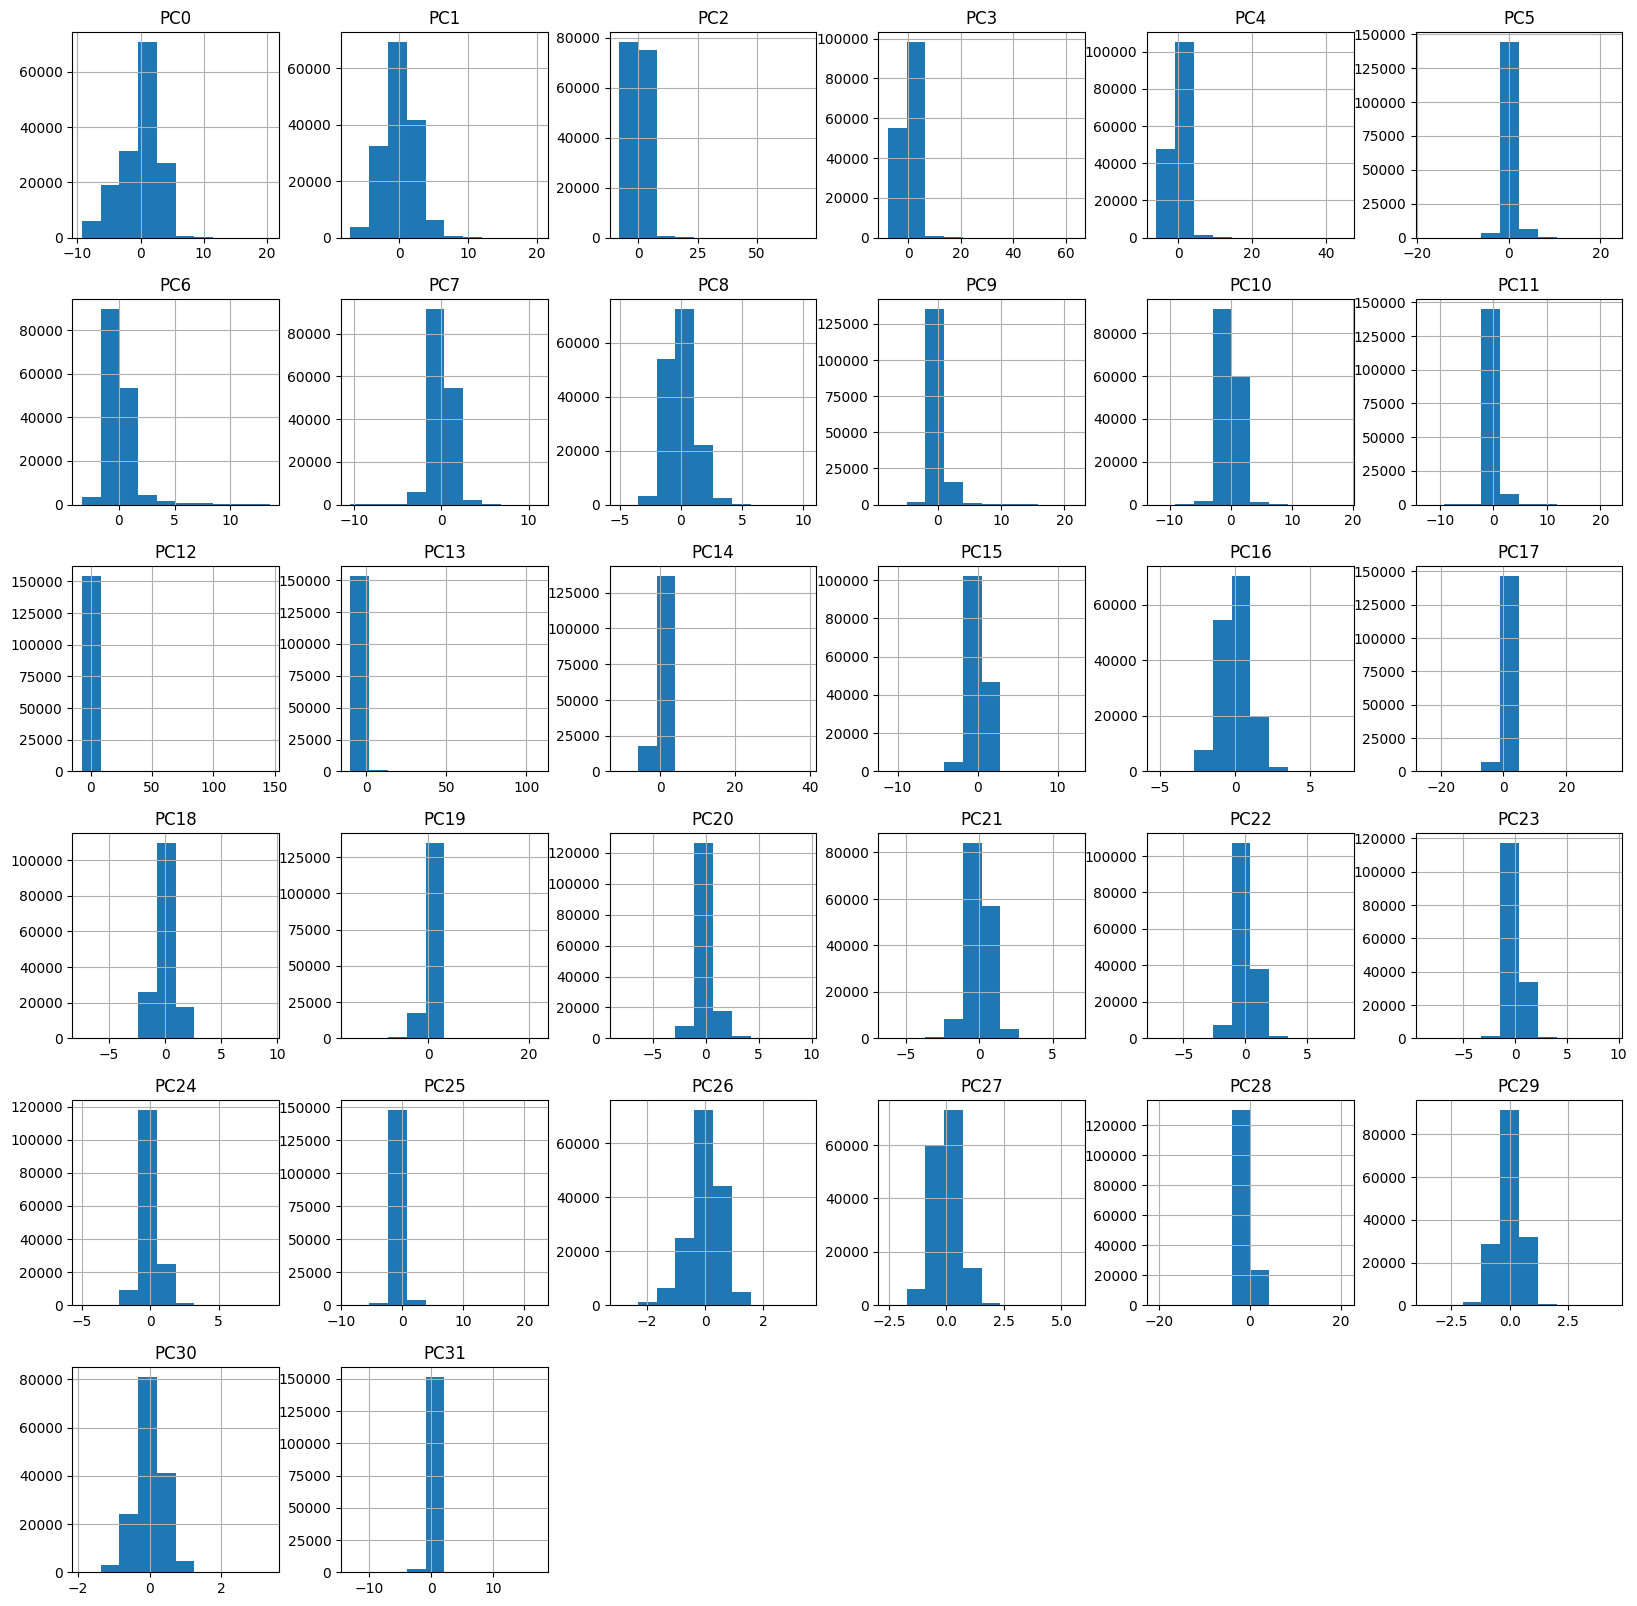

In [30]:
for _X_pca in [Xs_pca, Xs_15min_pca, Xs_1hour_pca]:
    pd.concat(_Xs_pca.values()).hist(figsize=(20,20))
    plt.show()

Plot correlation matrix of the data

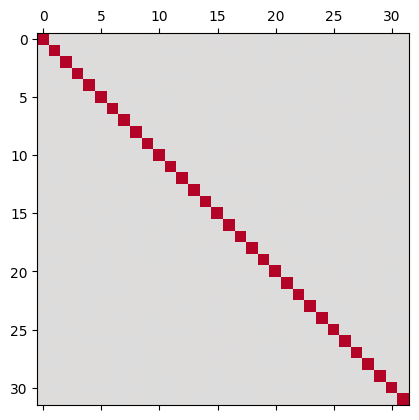

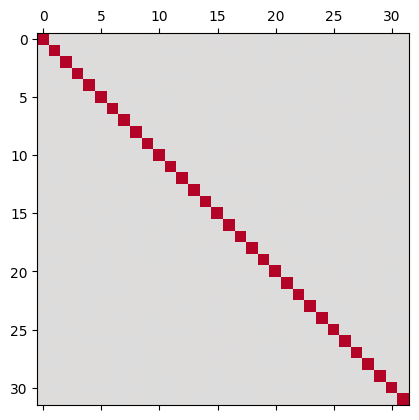

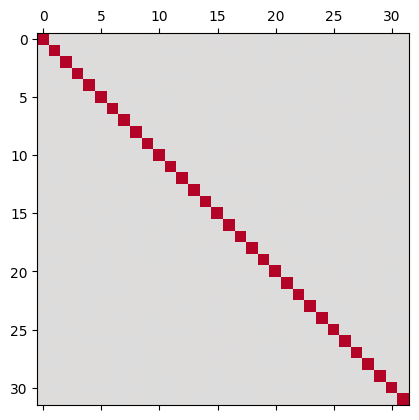

In [31]:
for _X_pca in [Xs_pca, Xs_15min_pca, Xs_1hour_pca]:
    plt.matshow(pd.concat(_Xs_pca.values()).corr(), cmap="coolwarm", vmin=-1, vmax=1)
    plt.show()

# Machine learning

## Darts setup

Convert to darts timeseries

In [32]:
from darts import TimeSeries

future_covs_15min = {loc: TimeSeries.from_dataframe(Xs_15min[loc]) for loc in Xs_15min}
targets_15min = {loc: TimeSeries.from_series(ys_15min[loc]) for loc in ys_15min}

future_covs_1hour = {loc: TimeSeries.from_dataframe(Xs_1hour[loc]) for loc in Xs_1hour}
targets_1hour = {loc: TimeSeries.from_series(ys_1hour[loc]) for loc in ys_1hour}

future_covs_15min_norm = {loc: TimeSeries.from_dataframe(Xs_15min_norm[loc]) for loc in Xs_15min_norm}
targets_15min_norm = {loc: TimeSeries.from_series(ys_15min_norm[loc]) for loc in ys_15min_norm}

future_covs_1hour_norm = {loc: TimeSeries.from_dataframe(Xs_1hour_norm[loc]) for loc in Xs_1hour_norm}
targets_1hour_norm = {loc: TimeSeries.from_series(ys_1hour_norm[loc]) for loc in ys_1hour_norm}

future_covs_15min_pca = {loc: TimeSeries.from_dataframe(Xs_15min_pca[loc]) for loc in Xs_15min_pca}
future_covs_1hour_pca = {loc: TimeSeries.from_dataframe(Xs_1hour_pca[loc]) for loc in Xs_1hour_pca}

n_15min = len(pd.date_range(start=ys_15min[loc].index[-1], end=test_dates[-1], freq='15T'))
n_1hour = len(pd.date_range(start=ys_1hour[loc].index[-1], end=test_dates[-1], freq='H'))

Save predictions to csv file

In [33]:
def extract_and_save(ys_pred, file_name, combine_BC=False, path="predictions", test_dates=test_dates):
    if combine_BC:
        locs = ["A", "BC", "BC"]
    else:
        locs = ["A", "B", "C"]
    
    y_pred = pd.concat([ys_pred[loc].pd_series()[test_dates[test_dates.minute == 0]] for loc in locs])
    y_pred[y_pred < 0] = 0
    y_pred.name = "prediction"
    y_pred = y_pred.reset_index(drop=True).reset_index().rename(columns={'index': 'id'})
    y_pred.to_csv(os.path.join(path, file_name), index=False)
    
    return y_pred

## XGBoost

Train and make predicitons

In [34]:
from darts.models import XGBModel

y_pred_15min = {}
y_pred_1hour = {}

for loc in targets_15min:
    xgb = XGBModel(lags=4, lags_future_covariates=(2,2))
    xgb.fit(targets_15min[loc], future_covariates=future_covs_15min[loc])
    y_pred_15min[loc] = xgb.predict(n_15min, future_covariates=future_covs_15min[loc])

for loc in targets_1hour:
    xgb = XGBModel(lags=4, lags_future_covariates=(2,2))
    xgb.fit(targets_1hour[loc], future_covariates=future_covs_1hour[loc])
    y_pred_1hour[loc] = xgb.predict(n_1hour, future_covariates=future_covs_1hour[loc])

Plot predictions

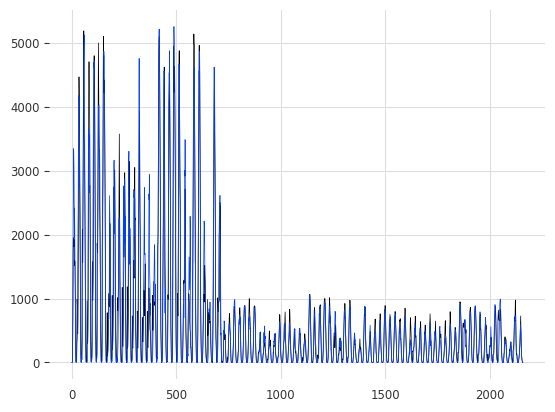

In [35]:
y_15min = extract_and_save(y_pred_15min, "xgb_pred_15min.csv")
if display_plots:
    y_15min["prediction"].plot(lw=0.5)
    plt.show()

y_1hour = extract_and_save(y_pred_1hour, "xgb_pred_1hour.csv")
if display_plots:
    y_1hour["prediction"].plot(lw=0.5)
    plt.show()